# Load Libraries and initial analysis

In [77]:
# Data manipulation and analysis
import pandas as pd  # Library for data manipulation and analysis, especially for tabular data (DataFrames)
import numpy as np  # Library for numerical computing, especially arrays and matrix operations

# Visualization
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
import seaborn as sns  # High-level interface for drawing attractive statistical graphics
import cartopy.crs as ccrs  # Library for map projections and geographic data visualizations
import cartopy.feature as cfeature  # Used to add features (e.g., coastlines, borders) to cartopy maps
import matplotlib.cm as cm  # Colormap utilities from Matplotlib

# Ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')  # Suppresses warnings to keep output cleaner

In [78]:
df = pd.read_csv('/Users/amulya/Desktop/Elsewhere/me/Work/Hackathons/Numhack/Temperature-and-Coral-Bleaching/notebooks/Cleaned_Coral_Data.csv')

In [79]:
df

,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Depth_m,...,Windspeed,SSTA,SSTA_Maximum,SSTA_Frequency,SSTA_DHW,TSA,TSA_Maximum,TSA_Frequency,TSA_DHW,Date
0,23.1630,-82.5260,Atlantic,Tropical Atlantic,Cuba and Cayman Islands,8519.23,Exposed,0.0287,49.90,10.00,...,8.0,-0.46,2.24,0.0,0.00,-0.80,1.83,0.00,0.00,2005-09-15
1,-17.5750,-149.7833,Pacific,Eastern Indo-Pacific,Society Islands French Polynesia,1431.62,Exposed,0.0262,51.20,14.00,...,2.0,1.29,3.10,0.5,0.26,1.29,3.00,0.25,0.26,1991-03-15
2,18.3690,-64.5640,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,182.33,Exposed,0.0429,61.52,7.00,...,8.0,0.04,2.83,16.0,0.00,-2.64,2.31,7.00,0.00,2006-01-15
3,17.7600,-64.5680,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,313.13,Exposed,0.0424,65.39,9.02,...,3.0,-0.07,2.47,22.0,0.00,-2.27,2.19,3.00,0.00,2006-04-15
4,17.7690,-64.5830,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,792.00,Exposed,0.0424,65.39,12.50,...,3.0,0.00,2.30,16.0,0.00,-2.19,1.87,3.00,0.00,2006-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26823,-3.2600,40.1500,Indian,Western Indo-Pacific,Kenya and Tanzania coast,1982.59,Sheltered,0.1505,42.73,1.50,...,5.0,1.06,7.58,14.0,5.46,1.06,6.32,4.00,3.42,2016-04-12
26824,-3.2600,40.1500,Indian,Western Indo-Pacific,Kenya and Tanzania coast,1982.59,Sheltered,0.1505,42.73,2.00,...,7.0,-0.37,7.58,15.0,7.62,-1.28,6.32,4.00,4.48,2016-05-19
26825,-8.3651,116.0844,Pacific,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,91.31,Sheltered,0.0372,47.39,5.60,...,8.0,-0.48,3.29,1.0,2.24,-0.82,2.76,1.00,2.09,2019-05-28
26826,-8.3473,116.0503,Pacific,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,129.08,Sheltered,0.0849,47.39,3.50,...,7.0,0.10,3.52,1.0,2.14,-0.09,2.86,1.00,2.00,2019-05-16


In [80]:
df.columns

Index(['Latitude_Degrees', 'Longitude_Degrees', 'Ocean_Name', 'Realm_Name',
       'Ecoregion_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity',
       'Cyclone_Frequency', 'Depth_m', 'Bleaching_Level', 'Percent_Bleaching',
       'SST', 'SST_Maximum', 'Windspeed', 'SSTA', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_DHW', 'TSA', 'TSA_Maximum', 'TSA_Frequency',
       'TSA_DHW', 'Date'],
      dtype='object')

We will copy the cleaned data into a new data frame to preserve the original for future reference during analysis.

In [81]:
# Copy the original dataset for analysis to avoid modifying the cleaned dataset
data_for_eda = df.copy()

# Initial Data Vizualizations

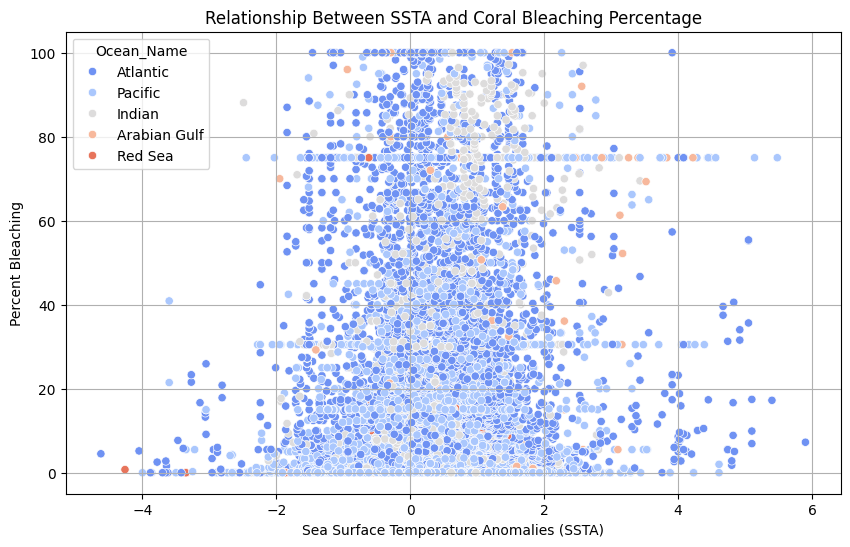

In [82]:
# Visualization 1: Relationship Between SSTA and Percent Bleaching
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="SSTA", y="Percent_Bleaching", hue="Ocean_Name", palette="coolwarm")
plt.title("Relationship Between SSTA and Coral Bleaching Percentage")
plt.xlabel("Sea Surface Temperature Anomalies (SSTA)")
plt.ylabel("Percent Bleaching")
plt.grid(True)
plt.show()

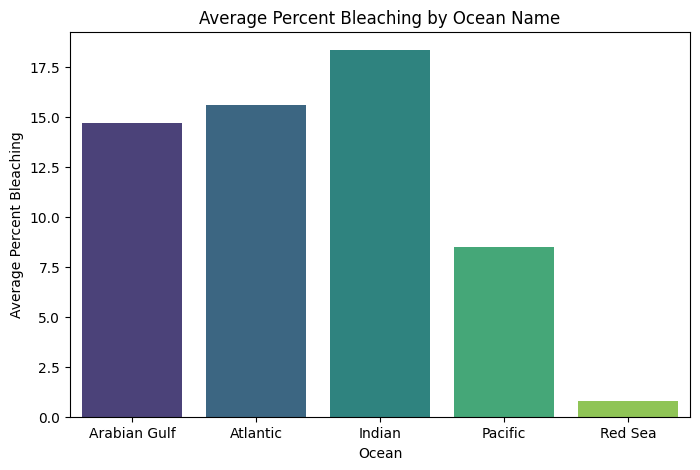

In [83]:
# Visualization 2: Average Percent Bleaching by Ocean Name
avg_bleaching = df.groupby("Ocean_Name")["Percent_Bleaching"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_bleaching, x="Ocean_Name", y="Percent_Bleaching", palette="viridis")
plt.title("Average Percent Bleaching by Ocean Name")
plt.xlabel("Ocean")
plt.ylabel("Average Percent Bleaching")
plt.show()

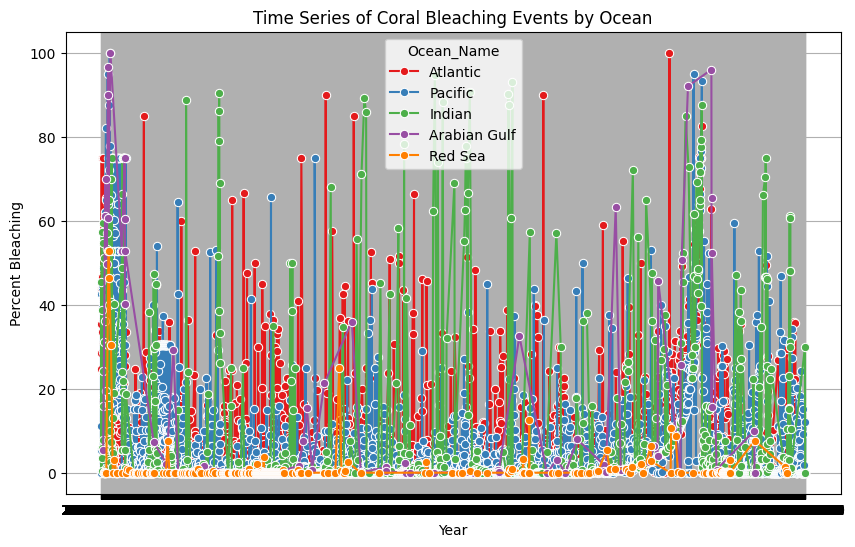

In [84]:
# Visualization 3: Time Series of Bleaching Events (Year vs. Percent Bleaching)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Date", y="Percent_Bleaching", hue="Ocean_Name", marker="o", palette="Set1")
plt.title("Time Series of Coral Bleaching Events by Ocean")
plt.xlabel("Year")
plt.ylabel("Percent Bleaching")
plt.grid(True)
plt.show()

# Insights gathered from the Variables

To gain an overview of the dataset, we will start by examining the geographic distribution of the data.

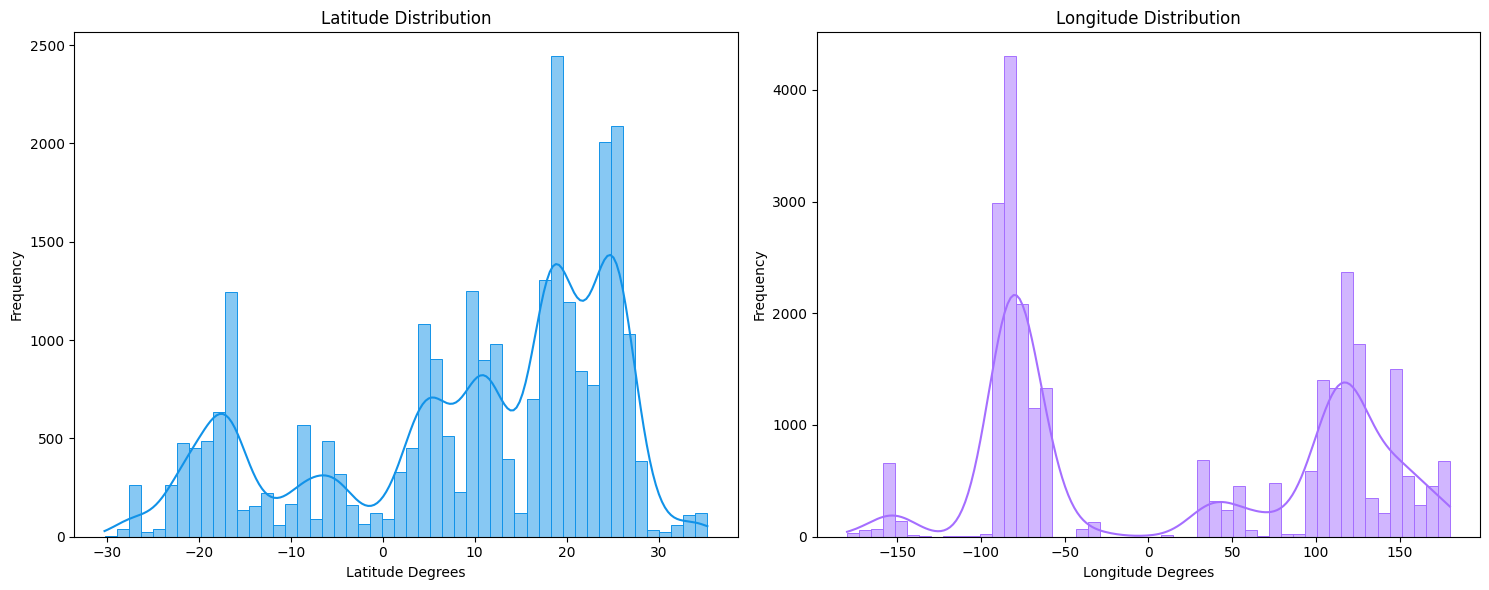

In [85]:
# Set up the figure and axes for the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define custom colors
color_latitude = '#1192e8' 
color_longitude = '#a56eff'

# Plotting Latitude Distribution
sns.histplot(data_for_eda['Latitude_Degrees'], bins=50, kde=True, color=color_latitude, edgecolor=color_latitude, ax=axes[0])
axes[0].set_title('Latitude Distribution')
axes[0].set_xlabel('Latitude Degrees')
axes[0].set_ylabel('Frequency')

# Plotting Longitude Distribution
sns.histplot(data_for_eda['Longitude_Degrees'], bins=50, kde=True, color=color_longitude, edgecolor=color_longitude, ax=axes[1])
axes[1].set_title('Longitude Distribution')
axes[1].set_xlabel('Longitude Degrees')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

🔎 **Observations:**

- **Latitude Distribution:**
    - The data is concentrated around **-20 to 30 degrees** latitude, indicating that most coral bleaching events occur in the **tropics and subtropics**.
    - Peaks are particularly noticeable around **-20 degrees** (which likely represents southern hemisphere regions) and **10-20 degrees north**, corresponding to tropical reef locations near the equator.

- **Longitude Distribution:**
    - The data is primarily concentrated between **-100 to 150 degrees** longitude.
    - There are significant peaks around **-100 degrees** (which may include regions in the Pacific Ocean and Americas) and **around 100-150 degrees**, which could correspond to locations like the **Indian Ocean** and **Western Pacific** regions.
    - The dataset includes a smaller presence of coral bleaching events in the Atlantic or other regions of the western hemisphere based on the gap near **-50 to 0 degrees** longitude.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Most coral bleaching data appears to come from tropical regions</strong>, both in the northern and southern hemispheres.</li>
        <li><strong>Pacific and Indian Ocean regions seem to dominate the dataset geographically</strong>, as indicated by the longitude distribution.</li>
    </ul>
</div>

These observations suggest that the dataset is focused on tropical coral reefs, likely located in major reef systems such as the **Great Barrier Reef** and the **Pacific coral regions**.

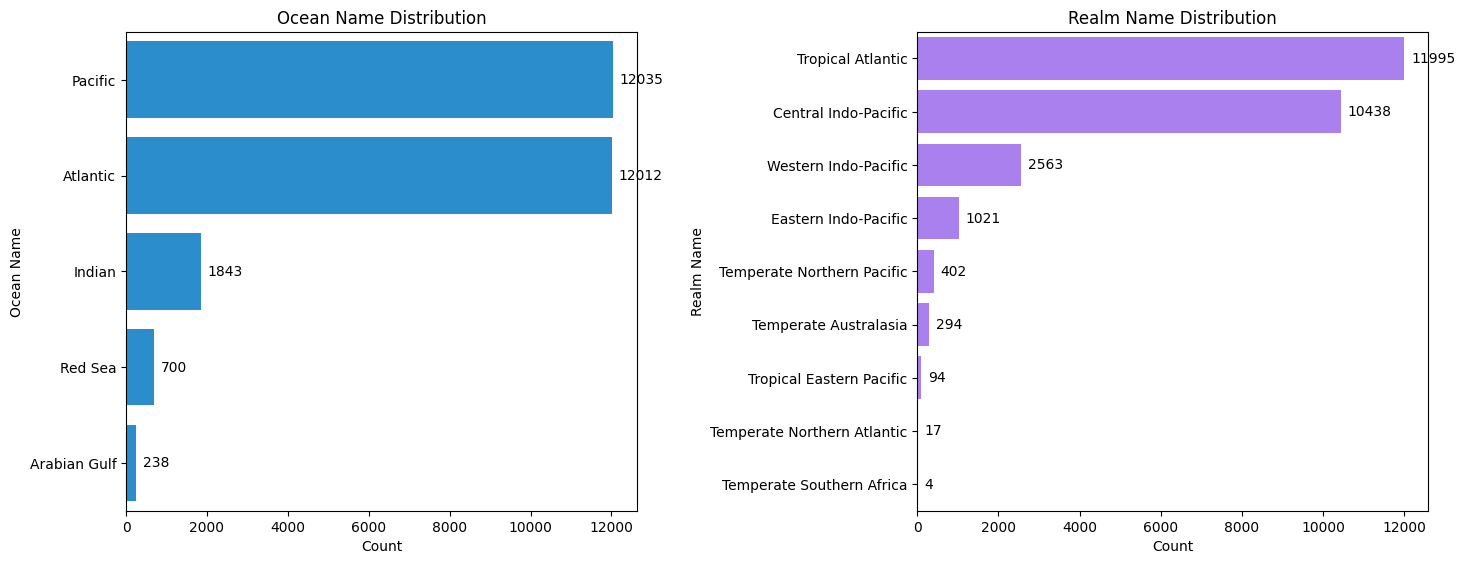

In [86]:
# Set up the figure and axes for the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Define colors for the subplots
color1 = '#1192e8'
color2 = '#a56eff'

# Plot Ocean Name Distribution
sns.countplot(y=data_for_eda['Ocean_Name'], ax=axes[0], 
              order=data_for_eda['Ocean_Name'].value_counts().index, color=color1)
axes[0].set_title('Ocean Name Distribution')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Ocean Name')

# Add labels on the bars for Ocean Name
axes[0].bar_label(axes[0].containers[0], fmt='%d', label_type='edge', padding=5)

# Plot Realm Name Distribution
sns.countplot(y=data_for_eda['Realm_Name'], ax=axes[1], 
              order=data_for_eda['Realm_Name'].value_counts().index, color=color2)
axes[1].set_title('Realm Name Distribution')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Realm Name')

# Add labels on the bars for Realm Name
axes[1].bar_label(axes[1].containers[0], fmt='%d', label_type='edge', padding=5)

# Adjust layout for better spacing and display
plt.tight_layout(pad=2)

# Show the plots
plt.show()

🔎 **Observations:**

- **Ocean Name Distribution:**
    - The majority of coral bleaching data comes from the **Atlantic Ocean**, followed closely by the **Pacific Ocean**.
    - The **Indian Ocean** has significantly fewer records compared to the Atlantic and Pacific.
    - The **Red Sea** and **Arabian Gulf** are the least represented regions in the dataset, indicating less data on coral bleaching from these areas.

- **Realm Name Distribution:**
    - The **Tropical Atlantic** dominates the dataset, with the most bleaching records.
    - The **Central Indo-Pacific** and **Western Indo-Pacific** realms also have a substantial amount of data, reflecting the prominence of coral reefs in these tropical areas.
    - **Eastern Indo-Pacific** has fewer records, and other temperate and tropical regions, such as the **Temperate Northern Pacific** and **Temperate Australasia**, have minimal representation.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Tropical regions, particularly in the Atlantic and Indo-Pacific, are the most impacted or documented in the dataset.</strong></li>
        <li><strong>Data gaps are evident for some regions</strong> like the Arabian Gulf, Red Sea, and Temperate zones, suggesting either fewer bleaching events or less reporting from these regions.</li>
    </ul>
</div>

These visualizations reinforce the importance of **tropical regions** as hotspots for coral bleaching, particularly the **Atlantic** and **Indo-Pacific** realms.

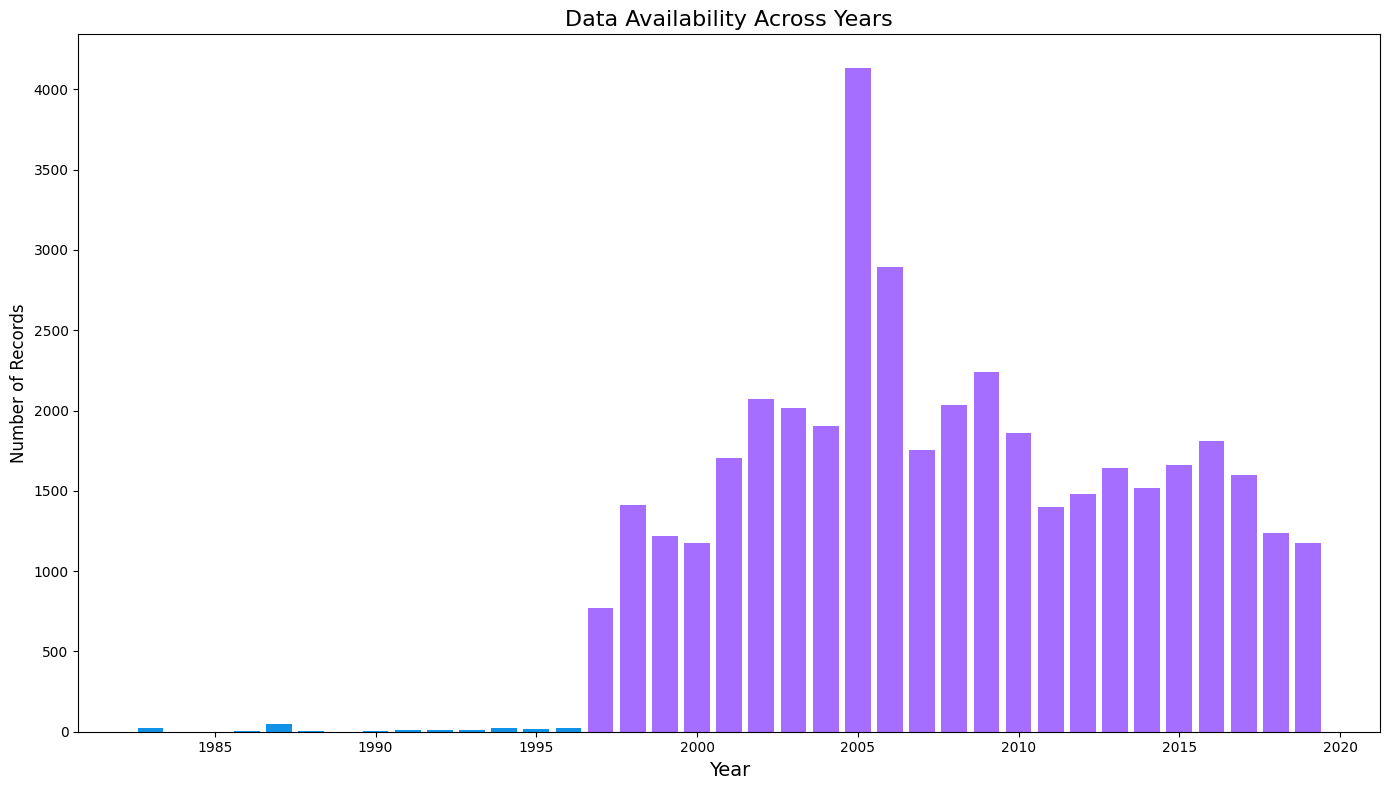

In [75]:
# Data Availablity across years
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
data_for_eda['Date'] = pd.to_datetime(data_for_eda['Date'], errors='coerce')

# Count the number of records per year
data_availability = data_for_eda['Date'].dt.year.value_counts().sort_index()

# Define colors: use '#a56eff' for years with more than 500 records, otherwise '#1192e8'
colors = ['#a56eff' if value > 500 else '#1192e8' for value in data_availability.values]

# Plotting the bar chart to show data availability across years
plt.figure(figsize=(14, 8))
plt.bar(data_availability.index, data_availability.values, color=colors)

# Set the title and labels
plt.title('Data Availability Across Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Records', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


🔎 **Observations:**

- **Pre-1995**: Very few records exist prior to the mid-1990s, suggesting that either coral bleaching was *less common* or that *data collection efforts* were not as extensive before this period.

- **1998-2005**: There is a steady increase in the number of records starting around **1998**, which coincides with some major **coral bleaching events**, including the **1998 global coral bleaching event**. This trend continues with a sharp rise through the early 2000s.

- **2005 Peak**: The year **2005** stands out as having the *highest number of records*, with **over 3,000 entries**. This spike may correspond to an **intense bleaching event** or an improvement in **data collection practices** during that year.

- **Post-2005 Decline**: After **2005**, there is a *noticeable decline* in the number of records, though the data remains relatively consistent between **2006-2015**, with some fluctuation.

- **Recent Years**: After **2015**, the number of records begins to decline again, with *very low data availability* in **2020**. This could be due to a variety of factors, including **less reporting**, **shifts in research focus**, or the impacts of **recent global events**.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Coral bleaching is heavily concentrated in tropical regions across the Pacific, Indian, and Atlantic Oceans.</strong></li>
        <li>The <strong>Pacific</strong> and <strong>Indian Oceans</strong> exhibit widespread and scattered bleaching events, reflecting the vast coral reef systems in these areas.</li>
        <li>The <strong>Caribbean</strong> and <strong>Red Sea</strong> stand out as smaller regions with high concentrations of bleaching events, indicating significant coral stress.</li>
    </ul>
</div>


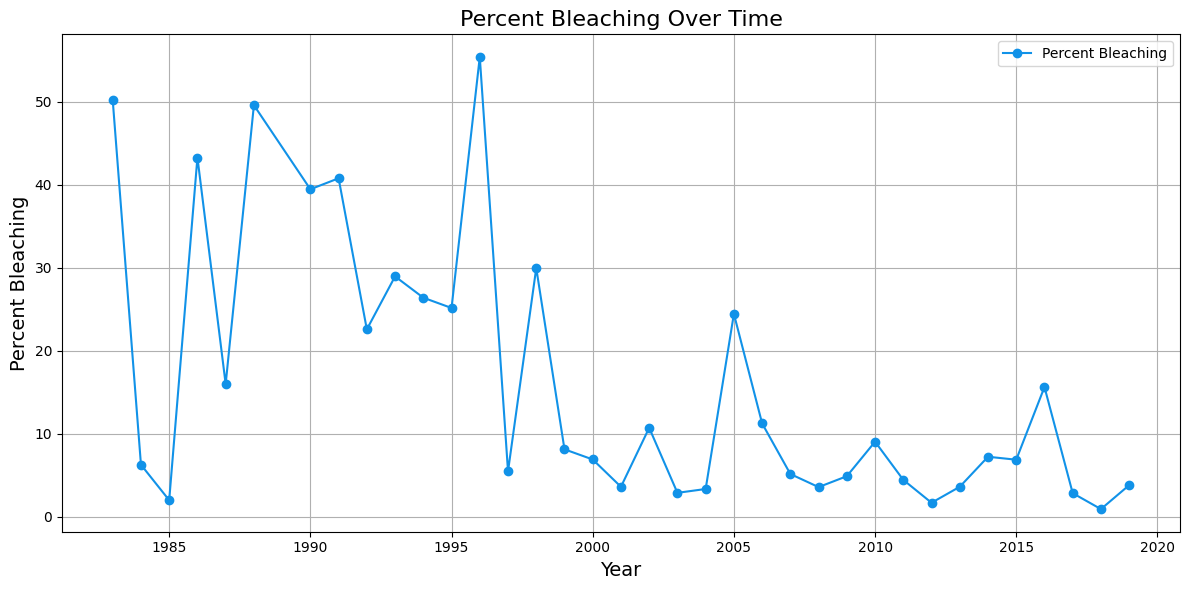

In [76]:
# Group the data by year and calculate the mean for Percent_Bleaching
percent_bleaching_over_time = data_for_eda.groupby(data_for_eda['Date'].dt.year)['Percent_Bleaching'].mean().reset_index()

# Define custom palette
custom_palette = ['#1192e8', '#a56eff']  # Blue and Pink

# Plotting the trends over time
plt.figure(figsize=(12, 6))
plt.plot(
    percent_bleaching_over_time['Date'], 
    percent_bleaching_over_time['Percent_Bleaching'], 
    label='Percent Bleaching', 
    color='#1192e8', 
    marker='o'
)

# Setting labels, title, and grid
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percent Bleaching', fontsize=14)
plt.title('Percent Bleaching Over Time', fontsize=16)
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



🔎 **Observations:**

- **Percent Bleaching Over Time (Top Graph):**
    - **1980s-1990s:** Severe bleaching events, with peaks up to **80%** in the early 1980s, followed by a **sharp decline** to below **20%** by the mid-1990s.
    - **Late 1990s-2000s:** Bleaching fluctuated between **20-60%**, with a spike in **1998** (global bleaching event) and another in **2005**, before dropping to **10-30%** in the 2010s.
    - **2020:** Bleaching levels fell to below **10%**.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Early bleaching events were more severe,</strong> especially in the 1980s and 1990s.</li>
        <li><strong>2005 saw a peak</strong> in bleaching events, followed by a gradual decline in intensity and frequency.</li>

</div>

<div style="border-radius:10px;padding: 15px;background-color:#6495ED
;color:white;font-size:100%;text-align:left">
    ⭐️ <strong>Key Takeaways:</strong>
    <ul>
        <li><strong>Tropical Regions are Most Affected:</strong> The dataset contains 23,261 records of coral bleaching percentages, indicating a substantial volume of data for analysis.</li>
        <br>
        <li><strong>Critical Coral Ecosystems Under Threat:</strong> These heavily impacted regions are home to some of the most critical coral ecosystems globally, making them especially vulnerable to environmental stressors such as rising ocean temperatures and climate change.</li>
        <br>
        <li><strong>Data Availability Peaks in 2005:</strong> The dataset shows a sharp increase in coral bleaching records starting from the late 1990s, with 2005 being a pivotal year for documentation, likely due to significant global bleaching events or enhanced monitoring efforts.</li>
        <br>
        <li><strong>Decline in Recent Years:</strong> There has been a notable decrease in data collection in recent years, particularly after 2015, which could reflect gaps in monitoring or challenges in data collection, possibly linked to global events like the COVID-19 pandemic.</li>
        <br>
        <li><strong>Importance of Ongoing Monitoring:</strong> The combination of geographic and temporal data highlights the need for continued monitoring and research to fully understand the global extent of coral bleaching and to address potential gaps in data collection efforts in recent years.</li>
        <br>
        <li><strong>Future Research Directions:</strong> These insights provide a foundation for further investigation into the specific drivers of coral bleaching and the localized impacts on different coral ecosystems worldwide. Effective strategies to mitigate these effects depend on sustained and comprehensive research efforts.</li>
    </ul>
</div>


In [87]:
# Statistical summary of bleaching percentage and bleaching level
data_for_eda[['Percent_Bleaching', 'Bleaching_Level']].describe(include='all')

,Percent_Bleaching,Bleaching_Level
count,26828.000000,26828
unique,NaN,2
top,NaN,Colony
freq,NaN,15631
mean,12.197217,NaN
std,22.054506,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,1.250000,NaN
75%,12.000000,NaN


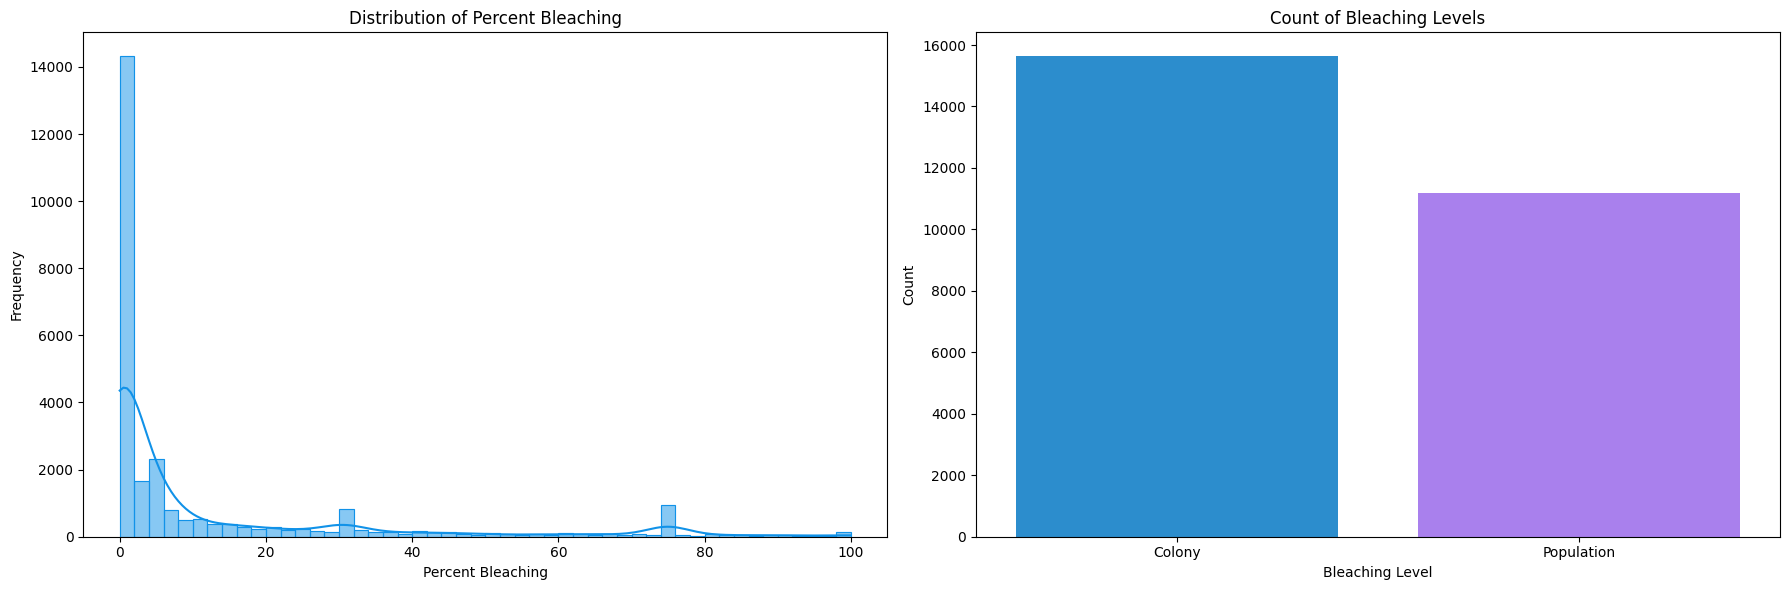

In [88]:
# Set up the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the histogram for Percent_Bleaching on the first subplot
sns.histplot(data_for_eda['Percent_Bleaching'], bins=50, kde=True, color='#1192e8', edgecolor='#1192e8', ax=axes[0])
axes[0].set_title('Distribution of Percent Bleaching')
axes[0].set_xlabel('Percent Bleaching')
axes[0].set_ylabel('Frequency')

# Custom color palette for the bar chart
custom_palette = ['#1192e8', '#a56eff']  # Blue and Pink

# Plot the bar chart for Bleaching_Level on the second subplot
sns.countplot(data=data_for_eda, x='Bleaching_Level', palette=custom_palette, ax=axes[1])
axes[1].set_title('Count of Bleaching Levels')
axes[1].set_xlabel('Bleaching Level')
axes[1].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plots
plt.show()

In [89]:
data_for_eda[['SST', 'SST_Maximum', 'SSTA', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_DHW', 'TSA', 'TSA_Maximum', 'TSA_Frequency', 'TSA_DHW']].describe(include='all')

,SST,SST_Maximum,SSTA,SSTA_Maximum,SSTA_Frequency,SSTA_DHW,TSA,TSA_Maximum,TSA_Frequency,TSA_DHW
count,26828.000000,26828.000000,26828.000000,26828.000000,26828.000000,26828.000000,26828.000000,26828.000000,26828.000000,26828.000000
mean,301.392190,305.107897,0.270168,3.450651,7.467943,3.184726,-0.930417,2.775499,2.081005,1.407645
std,1.950856,1.266523,0.846796,1.170069,6.225766,4.893882,1.670683,0.967046,3.095801,3.854715
min,287.040000,300.380000,-4.620000,0.000000,0.000000,0.000000,-11.970000,0.000000,0.000000,0.000000
25%,300.390000,304.420000,-0.240000,2.780000,3.000000,0.000000,-1.740000,2.230000,0.000000,0.000000
50%,301.710000,305.040000,0.250000,3.180000,6.000000,1.370000,-0.680000,2.530000,1.000000,0.000000
75%,302.700000,305.750000,0.770000,3.700000,11.000000,4.550000,0.160000,3.030000,3.000000,1.280000
max,310.440000,313.140000,5.900000,19.890000,52.000000,53.600000,5.900000,13.450000,29.000000,52.450000


🔎 **Observations:**

- **Sea Surface Temperature (SST) and SST Maximum:**
    - Mean **SST** is **301.43 K** (~**28.28°C**), with a maximum of **310.44 K** (~**37.29°C**), reflecting occasional extreme heat events.
    - **SST Maximum** averages **305.11 K** (~**32°C**), indicating frequent high temperatures in coral areas.

- **Sea Surface Temperature Anomaly (SSTA) and SSTA Maximum:**
    - Mean **SSTA** is **0.29 K**, with a **maximum anomaly** of **19.89 K**, showing significant deviations from normal temperatures in some regions.

- **SSTA Frequency and DHW:**
    - Mean **SSTA Frequency** is **7.61**, indicating frequent anomalies.
    - Mean **SSTA DHW** is **3.30**, with a maximum of **53.6**, reflecting prolonged thermal stress in certain areas.

- **Thermal Stress Anomaly (TSA) and TSA Maximum:**
    - Mean **TSA** is **-0.90 K**, with **TSA Maximum** of **2.76 K**, showing occasional temperatures exceeding bleaching thresholds.

- **TSA Frequency and DHW:**
    - **TSA Frequency** averages **2.12**, with **TSA DHW** peaking at **52.45**, indicating sustained stress accumulation.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Frequent extreme SSTA events</strong> contribute to coral bleaching.</li>
        <li><strong>Prolonged thermal stress</strong> (high DHW) drives sustained bleaching.</li>
        <li><strong>Localized extremes</strong> show certain regions face severe, sustained heat stress.</li>
    </ul>
</div>

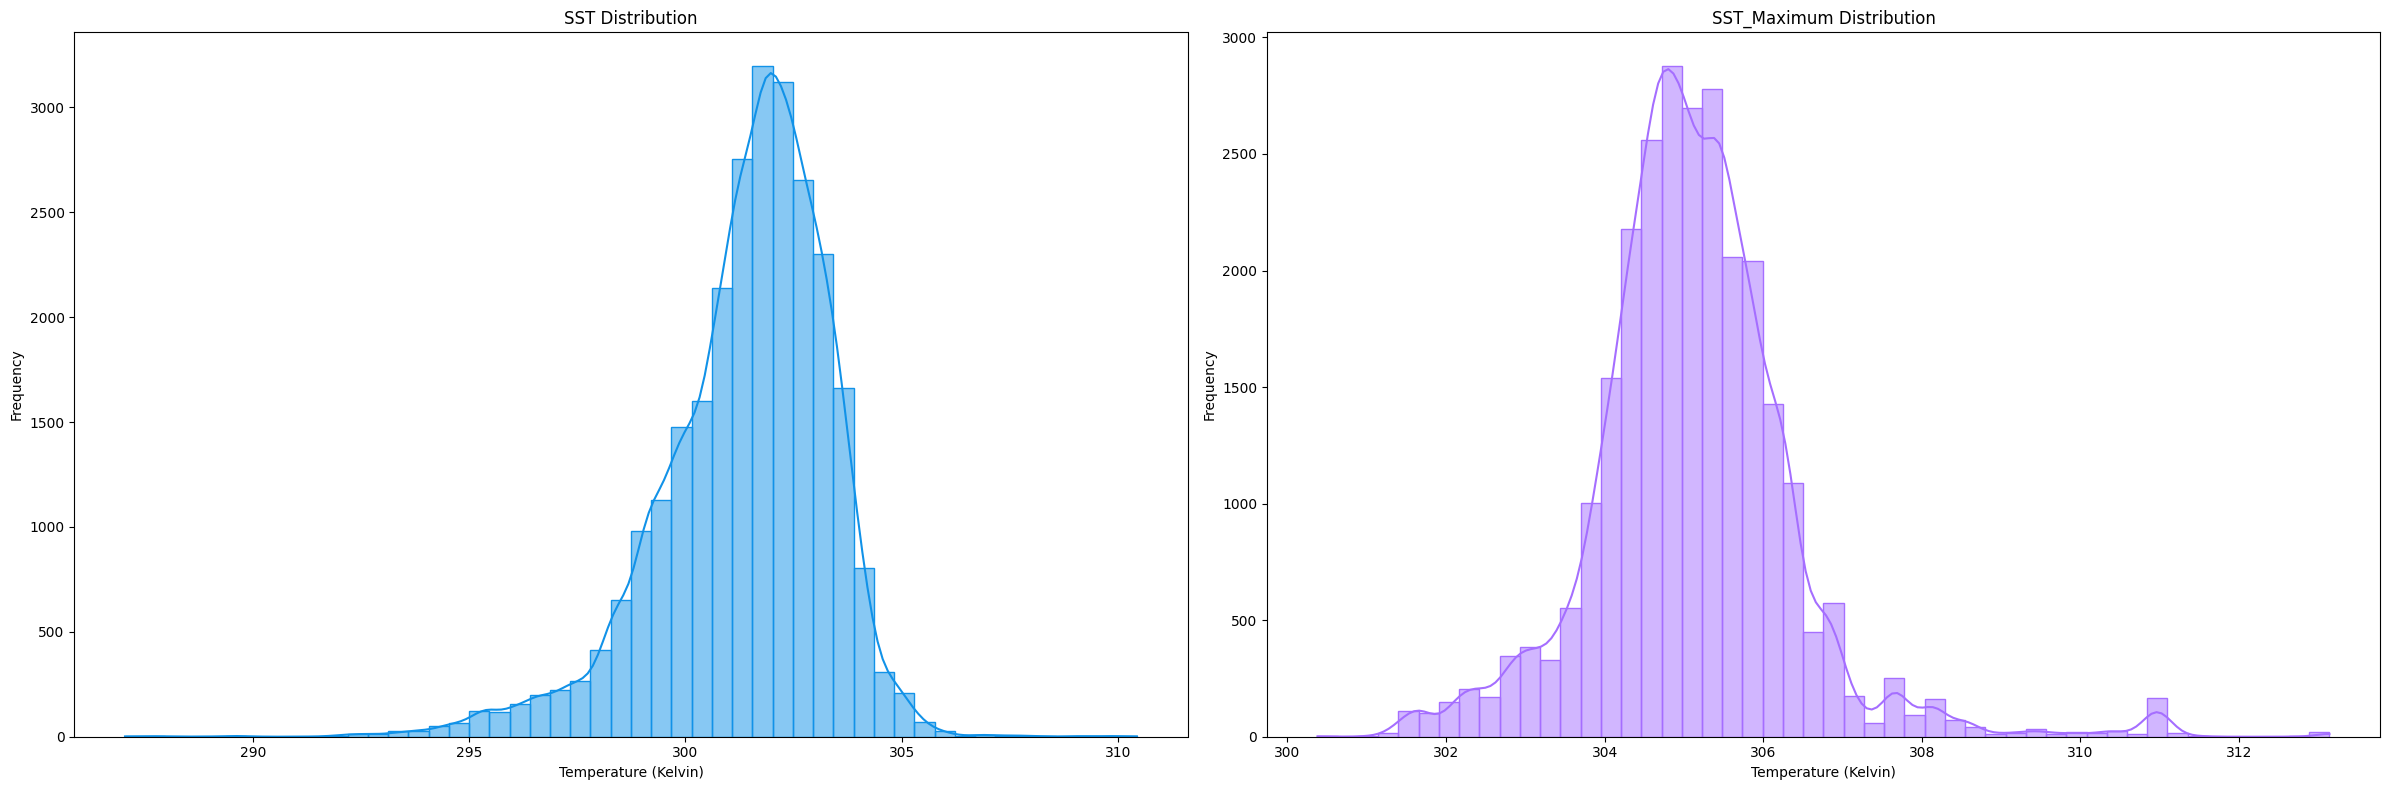

In [90]:
# Define custom palette
custom_palette = ['#1192e8', '#a56eff']  # Blue for SST, Pink for SST_Maximum

# Create a figure with 2 subplots (1x2 layout)
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Plot SST on the first subplot with blue color
sns.histplot(data_for_eda['SST'], bins=50, kde=True, color=custom_palette[0], label='SST', alpha=0.5, ax=axs[0], edgecolor=custom_palette[0])
axs[0].set_title('SST Distribution')
axs[0].set_xlabel('Temperature (Kelvin)')
axs[0].set_ylabel('Frequency')

# Plot SST_Maximum on the second subplot with pink color
sns.histplot(data_for_eda['SST_Maximum'], bins=50, kde=True, color=custom_palette[1], label='SST_Maximum', alpha=0.5, ax=axs[1], edgecolor=custom_palette[1])
axs[1].set_title('SST_Maximum Distribution')
axs[1].set_xlabel('Temperature (Kelvin)')
axs[1].set_ylabel('Frequency')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

🔎 **Observations:**

- **SST Distribution (Left Plot):**
    - **SST** is mostly between **300-305 K** (~**27-32°C**), peaking at **302-303 K** (~**29-30°C**), indicating tropical/subtropical conditions typical of coral regions.
    - Temperatures below **295 K** and above **305 K** are rare.

- **SST Maximum Distribution (Right Plot):**
    - Slight skew towards higher temperatures, peaking at **305 K** (~**32°C**), with extremes up to **310 K** (~**37°C**).
    - A small bump at **308-310 K** reflects occasional **extreme warming events** linked to coral bleaching.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Normal SST distributions</strong> align with tropical coral habitats.</li>
        <li><strong>Extreme SST Maximum values</strong> (above <strong>308 K</strong>) indicate localized thermal stress.</li>
        <li><strong>Slight skew in SST Maximum</strong> suggests periodic extreme warming, driving severe coral bleaching.</li>
    </ul>
</div>

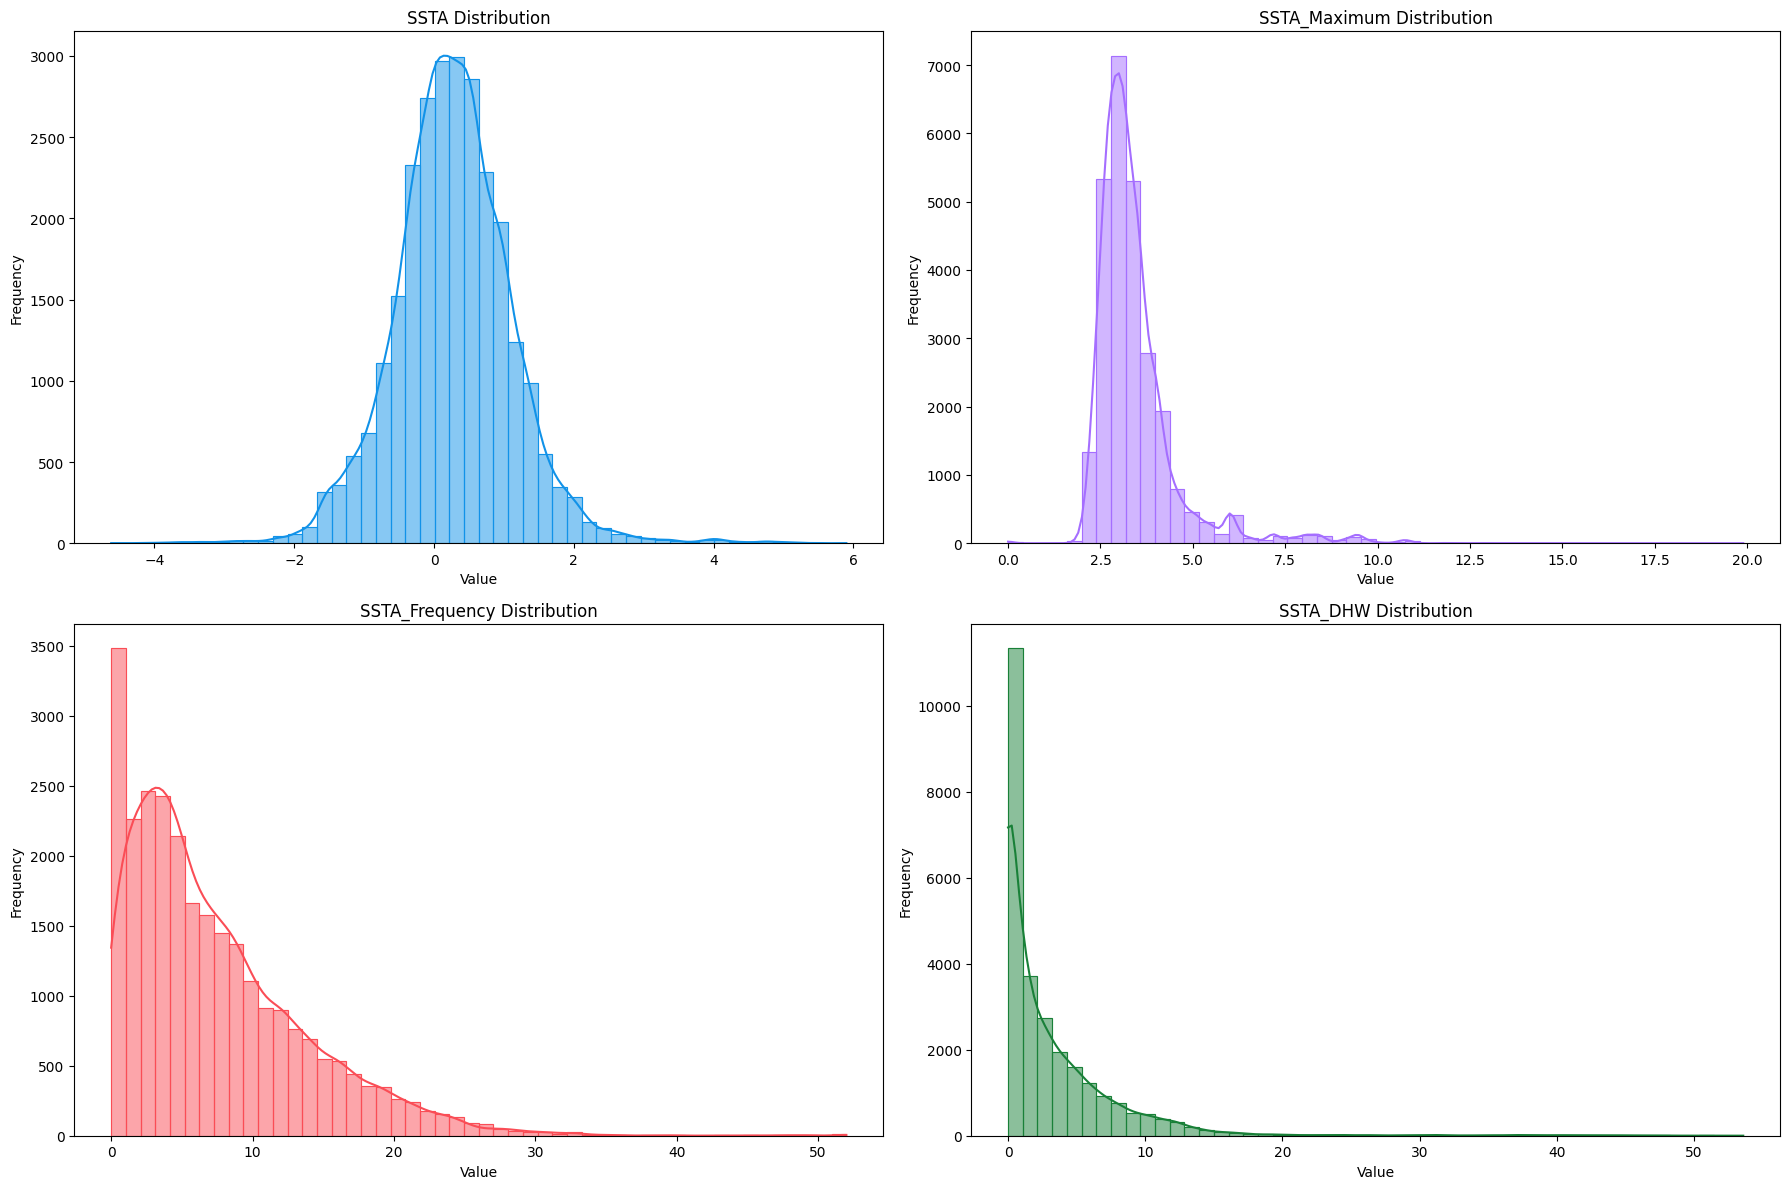

In [91]:
# Define custom palette
custom_palette = ['#1192e8', '#a56eff', '#fa4d56', '#198038']  # Blue, Pink, Red, Green

# Create a figure with 4 subplots (2x2 layout)
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot SSTA on the first subplot with blue color
sns.histplot(data_for_eda['SSTA'], bins=50, kde=True, color=custom_palette[0], label='SSTA', alpha=0.5, ax=axs[0, 0], edgecolor=custom_palette[0])
axs[0, 0].set_title('SSTA Distribution')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')

# Plot SSTA_Maximum on the second subplot with pink color
sns.histplot(data_for_eda['SSTA_Maximum'], bins=50, kde=True, color=custom_palette[1], label='SSTA_Maximum', alpha=0.5, ax=axs[0, 1], edgecolor=custom_palette[1])
axs[0, 1].set_title('SSTA_Maximum Distribution')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Frequency')

# Plot SSTA_Frequency on the third subplot with red color
sns.histplot(data_for_eda['SSTA_Frequency'], bins=50, kde=True, color=custom_palette[2], label='SSTA_Frequency', alpha=0.5, ax=axs[1, 0], edgecolor=custom_palette[2])
axs[1, 0].set_title('SSTA_Frequency Distribution')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')

# Plot SSTA_DHW on the fourth subplot with green color
sns.histplot(data_for_eda['SSTA_DHW'], bins=50, kde=True, color=custom_palette[3], label='SSTA_DHW', alpha=0.5, ax=axs[1, 1], edgecolor=custom_palette[3])
axs[1, 1].set_title('SSTA_DHW Distribution')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

🔎 **Observations:**

- **SSTA Distribution (Top Left):**
    - Centered around **0 K**, most anomalies are mild, between **-1 K and 1 K**, but some reach **5-6 K**, indicating significant warming events.

- **SSTA Maximum Distribution (Top Right):**
    - Skewed right, with most anomalies between **2-5 K**; some exceed **10 K**, highlighting severe warming in specific regions.

- **SSTA Frequency Distribution (Bottom Left):**
    - Heavily skewed, with most regions facing fewer than **10 anomaly events**, but some experience up to **50**, reflecting persistent thermal stress.

- **SSTA DHW Distribution (Bottom Right):**
    - Right-skewed, with most regions below **10 DHW**, but some exceed **50**, indicating extreme and prolonged thermal stress.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Moderate anomalies are common</strong>, but extreme SSTA events drive coral stress.</li>
        <li><strong>Prolonged thermal stress (high DHW)</strong> contributes to severe bleaching in vulnerable regions.</li>
        <li><strong>Localized extreme warming events</strong> are major contributors to coral bleaching.</li>
    </ul>
</div>

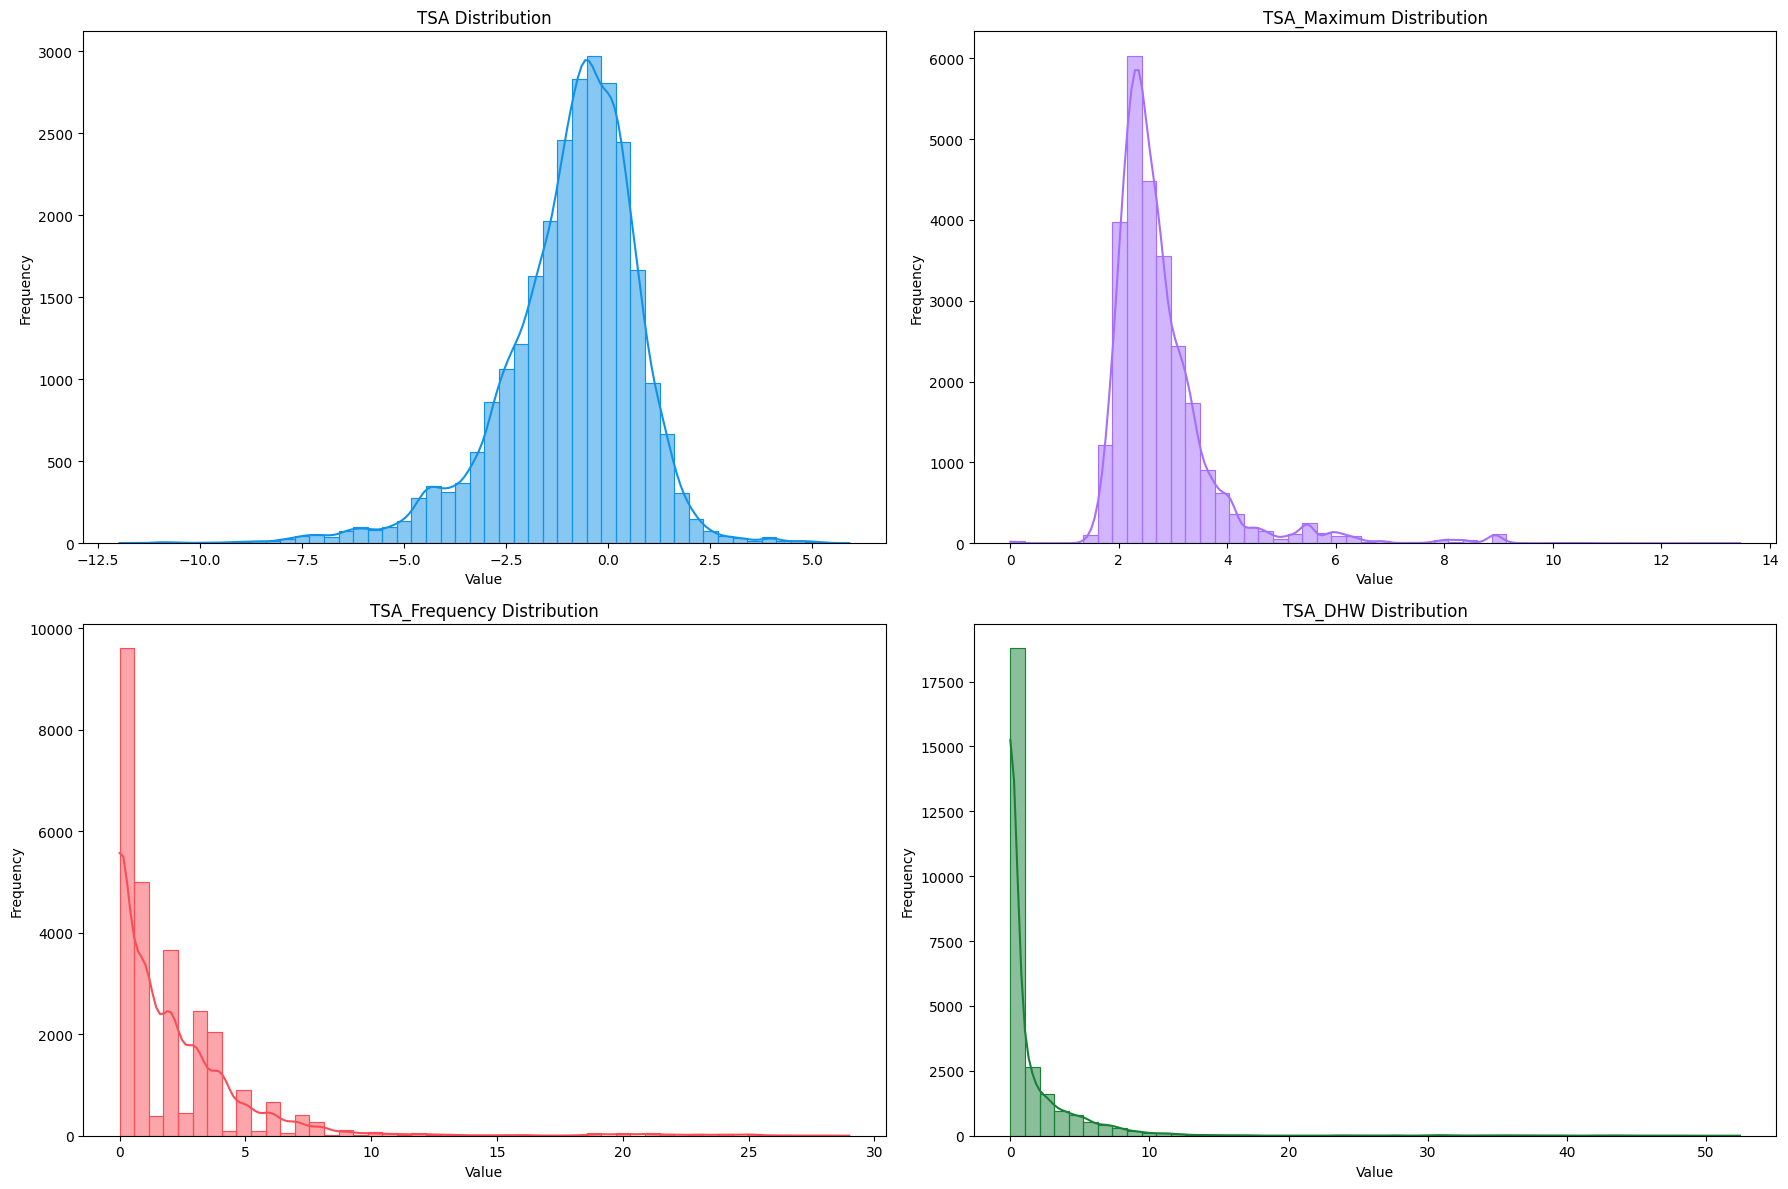

In [92]:
# Define custom palette
custom_palette = ['#1192e8', '#a56eff', '#fa4d56', '#198038']  # Blue, Pink, Red, Green

# Create a figure with 4 subplots (2x2 layout)
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot TSA on the first subplot with blue color
sns.histplot(data_for_eda['TSA'], bins=50, kde=True, color=custom_palette[0], label='TSA', alpha=0.5, ax=axs[0, 0], edgecolor=custom_palette[0])
axs[0, 0].set_title('TSA Distribution')
axs[0, 0].set_xlabel('Value')
axs[0, 0].set_ylabel('Frequency')

# Plot TSA_Maximum on the second subplot with pink color
sns.histplot(data_for_eda['TSA_Maximum'], bins=50, kde=True, color=custom_palette[1], label='TSA_Maximum', alpha=0.5, ax=axs[0, 1], edgecolor=custom_palette[1])
axs[0, 1].set_title('TSA_Maximum Distribution')
axs[0, 1].set_xlabel('Value')
axs[0, 1].set_ylabel('Frequency')

# Plot TSA_Frequency on the third subplot with red color
sns.histplot(data_for_eda['TSA_Frequency'], bins=50, kde=True, color=custom_palette[2], label='TSA_Frequency', alpha=0.5, ax=axs[1, 0], edgecolor=custom_palette[2])
axs[1, 0].set_title('TSA_Frequency Distribution')
axs[1, 0].set_xlabel('Value')
axs[1, 0].set_ylabel('Frequency')

# Plot TSA_DHW on the fourth subplot with green color
sns.histplot(data_for_eda['TSA_DHW'], bins=50, kde=True, color=custom_palette[3], label='TSA_DHW', alpha=0.5, ax=axs[1, 1], edgecolor=custom_palette[3])
axs[1, 1].set_title('TSA_DHW Distribution')
axs[1, 1].set_xlabel('Value')
axs[1, 1].set_ylabel('Frequency')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

🔎 **Observations:**

- **TSA Distribution:** Centered around **0**, slightly skewed negative, with some areas experiencing significantly lower thermal stress.
- **TSA Maximum Distribution:** Concentrated between **2-4 K**, with fewer cases above **5 K**, indicating areas with higher bleaching risk.
- **TSA Frequency Distribution:** Most regions have **0-5 events**, but persistent stress occurs in some areas.
- **TSA DHW Distribution:** Values mostly under **10 K-weeks**, but some areas experience prolonged stress, up to **50 K-weeks**.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Negative TSA values</strong> reduce coral stress; positive values increase bleaching risk.</li>
        <li><strong>TSA Maximum values around 3 K</strong> signal heightened bleaching risk.</li>
        <li><strong>High TSA frequency</strong> weakens coral resilience.</li>
        <li><strong>High TSA DHW</strong> indicates severe, prolonged stress, increasing vulnerability to bleaching.</li>
    </ul>
</div>


<div style="border-radius:10px;padding: 15px;background-color:#6495ED;color:white;font-size:100%;text-align:left">
📝 <strong>Key Takeaways:</strong>
<ul>
    <li><strong>SST and Bleaching:</strong> Higher <strong>SST</strong> is strongly linked to coral bleaching, especially beyond <strong>300 K (~27°C)</strong>, where bleaching severity increases rapidly, showing coral sensitivity to persistent heat.</li>
    <li><strong>SSTA and Bleaching:</strong> <strong>SSTA</strong> (temperature anomalies) have a strong correlation with bleaching, with prolonged anomalies (high <strong>DHW</strong>) driving the most severe bleaching events, often reaching up to <strong>100%</strong> in some regions.</li>
    <li><strong>Thermal Stress and Bleaching:</strong> Repeated thermal stress events (high <strong>SSTA Frequency</strong>) and prolonged stress (high <strong>TSA DHW</strong>) result in compounded bleaching, but the impact levels off at extreme values, suggesting coral mortality or adaptation.</li>
    <li><strong>Nonlinear Effects:</strong> The relationship between bleaching and thermal stress metrics is nonlinear, with a threshold effect where bleaching does not continue to increase indefinitely as stress increases, pointing to the complex dynamics of coral stress responses.</li>
</ul>
</div>

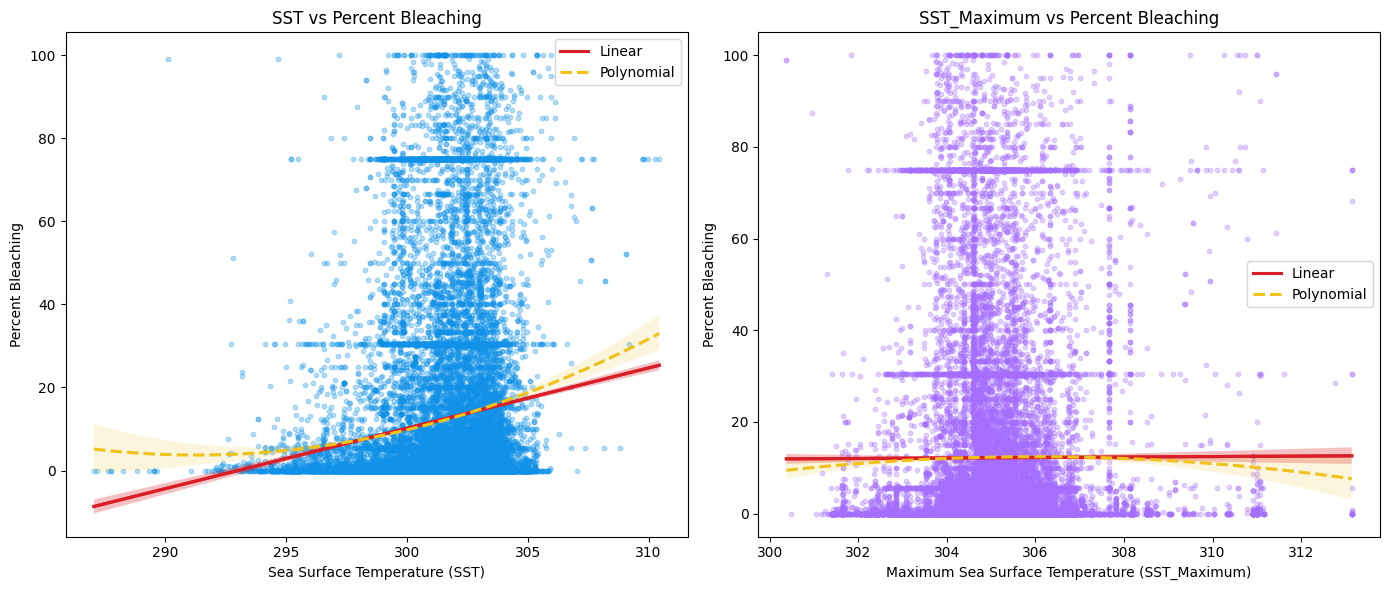

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with both linear and polynomial regression lines
plt.figure(figsize=(14, 6))

# Plot for SST vs Percent Bleaching
plt.subplot(1, 2, 1)
# Plot the scatter points first
sns.regplot(x='SST', y='Percent_Bleaching', data=data_for_eda, 
            scatter_kws={'alpha': 0.3, 's': 10, 'color': '#1192e8'},  # Blue scatter
            line_kws={'color': '#da1e28'}, label='_nolegend_')  # No label for scatter

# Plot the linear regression line
sns.regplot(x='SST', y='Percent_Bleaching', data=data_for_eda, 
            scatter=False,  # No scatter points, only the line
            line_kws={'color': '#da1e28'}, label='Linear')  # Red solid linear line

# Plot the polynomial regression (order 2)
sns.regplot(x='SST', y='Percent_Bleaching', data=data_for_eda, 
            scatter=False,  # No scatter points, only the line
            line_kws={'color': '#f1c21b', 'linestyle': '--'}, order=2, label='Polynomial')  # Yellow dashed polynomial line

# Adding legend manually
plt.title('SST vs Percent Bleaching')
plt.xlabel('Sea Surface Temperature (SST)')
plt.ylabel('Percent Bleaching')
plt.legend()

# Plot for SST_Maximum vs Percent Bleaching
plt.subplot(1, 2, 2)
# Plot the scatter points first
sns.regplot(x='SST_Maximum', y='Percent_Bleaching', data=data_for_eda, 
            scatter_kws={'alpha': 0.3, 's': 10, 'color': '#a56eff'},  # Pink scatter
            line_kws={'color': '#da1e28'}, label='_nolegend_')  # No label for scatter

# Plot the linear regression line
sns.regplot(x='SST_Maximum', y='Percent_Bleaching', data=data_for_eda, 
            scatter=False,  # No scatter points, only the line
            line_kws={'color': '#da1e28'}, label='Linear')  # Red solid linear line

# Plot the polynomial regression (order 2)
sns.regplot(x='SST_Maximum', y='Percent_Bleaching', data=data_for_eda, 
            scatter=False,  # No scatter points, only the line
            line_kws={'color': '#f1c21b', 'linestyle': '--'}, order=2, label='Polynomial')  # Yellow dashed polynomial line

# Adding legend manually
plt.title('SST_Maximum vs Percent Bleaching')
plt.xlabel('Maximum Sea Surface Temperature (SST_Maximum)')
plt.ylabel('Percent Bleaching')
plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

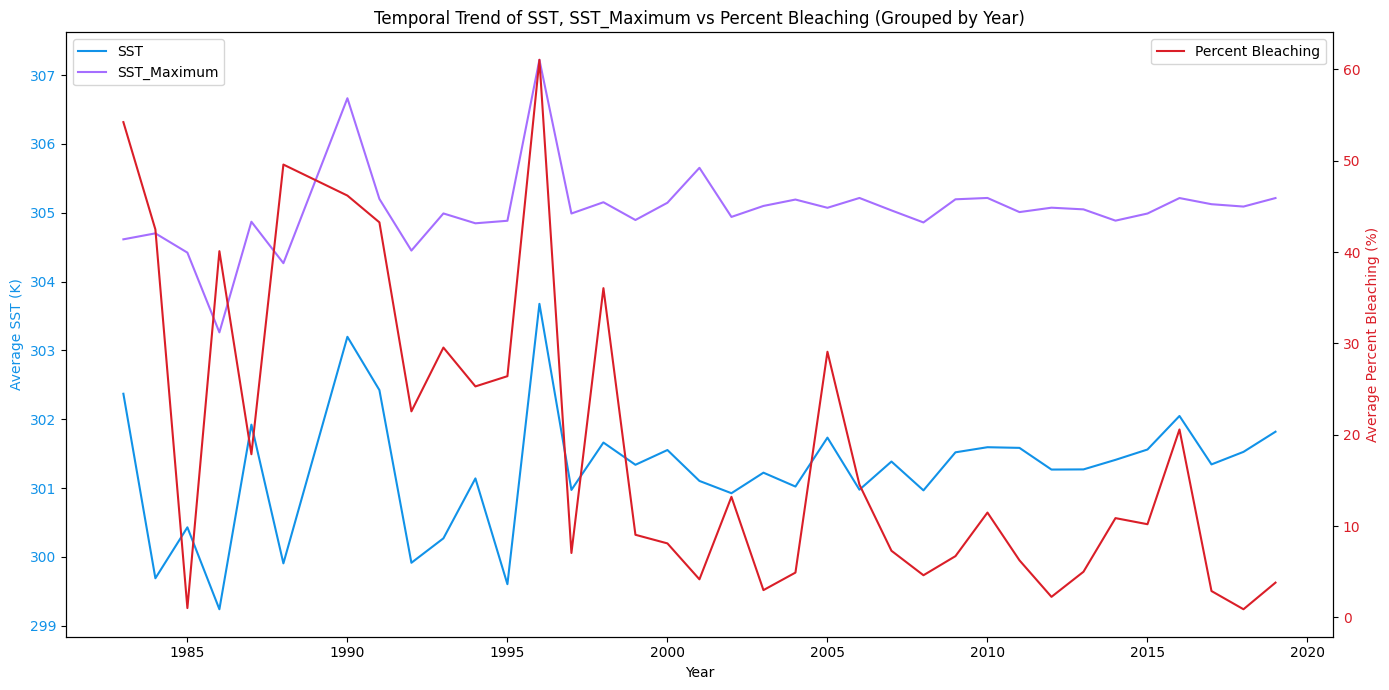

In [95]:
# Ensure 'Date' column is in datetime format
data_for_eda['Date'] = pd.to_datetime(data_for_eda['Date'], errors='coerce')

# Extract the year from the 'Date' column
data_for_eda['Year'] = data_for_eda['Date'].dt.year

# Group the data by year and calculate the mean for SST, SST_Maximum, and Percent Bleaching
grouped_data = data_for_eda.groupby('Year').agg({
    'SST': 'mean',
    'SST_Maximum': 'mean',
    'Percent_Bleaching': 'mean'
}).reset_index()

# Plotting the temporal trend using dual y-axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot SST and SST_Maximum on the first y-axis
ax1.plot(grouped_data['Year'], grouped_data['SST'], color='#1192e8', label='SST')  # Blue for SST
ax1.plot(grouped_data['Year'], grouped_data['SST_Maximum'], color='#a56eff', label='SST_Maximum')  # Pink for SST_Maximum
ax1.set_xlabel('Year')
ax1.set_ylabel('Average SST (K)', color='#1192e8')  # Blue for SST label and ticks
ax1.tick_params(axis='y', labelcolor='#1192e8')

# Create a second y-axis for Percent Bleaching
ax2 = ax1.twinx()
ax2.plot(grouped_data['Year'], grouped_data['Percent_Bleaching'], color='#da1e28', label='Percent Bleaching')  # Red for Percent Bleaching
ax2.set_ylabel('Average Percent Bleaching (%)', color='#da1e28')  # Red for Percent Bleaching label and ticks
ax2.tick_params(axis='y', labelcolor='#da1e28')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set title and show plot
plt.title('Temporal Trend of SST, SST_Maximum vs Percent Bleaching (Grouped by Year)')
fig.tight_layout()
plt.show()

🔎 **Observations:**

- **SST (Sea Surface Temperature) Trends:**
    - The **SST** (blue line) shows variability over time, with fluctuations between **300 K (~27°C)** and **303 K (~30°C)**.
    - In recent years (post-2010), there has been a gradual increase in SST, with average values consistently around **302 K (~29°C)**.
    - This rise in SST over time is an indicator of long-term warming trends in sea surface temperatures, which could contribute to coral stress and bleaching.

- **SST Maximum Trends:**
    - The **SST Maximum** (green line) shows a consistently higher trend compared to SST, ranging from **304 K to 307 K (~31-34°C)**.
    - The SST Maximum values have fluctuated over the years, peaking around **1990** and the early **2000s**, with slight decreases in the last decade.
    - Despite fluctuations, the SST Maximum remains elevated, suggesting frequent occurrences of extreme heat events that could stress coral reefs.

- **Percent Bleaching Trends:**
    - The **Percent Bleaching** (red line) shows significant fluctuations over the years, with peaks in the early **1980s**, mid-**1990s**, and early **2000s**.
    - There is a clear spike in percent bleaching corresponding to periods of higher SST Maximum values, particularly around **1985**, **1995**, and **2005**, suggesting that extreme heat events lead to increased coral bleaching.
    - More recently, the bleaching percentages have been relatively lower (below **20%**), despite consistent high SST Maximum values, possibly indicating regional variations or periods of recovery.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li>The increasing <strong>SST Trend</strong> over time reflects the gradual warming of oceans, contributing to long-term coral stress and potential bleaching.</li>
        <li><strong>SST Maximum peaks</strong> are closely associated with higher bleaching percentages, emphasizing the role of extreme heat events in driving severe coral bleaching episodes.</li>
        <li>Despite periods of lower bleaching in the most recent years, the continued presence of high <strong>SST Maximum</strong> values suggests that coral reefs remain at risk of severe bleaching due to ongoing thermal stress.</li>
    </ul>
</div>

This visualization highlights the critical relationship between extreme SST events and coral bleaching, reinforcing the importance of monitoring both average and maximum sea surface temperatures to predict and manage coral reef health in the context of climate change.

## Looking at Other Factors

/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_49719/2632740671.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




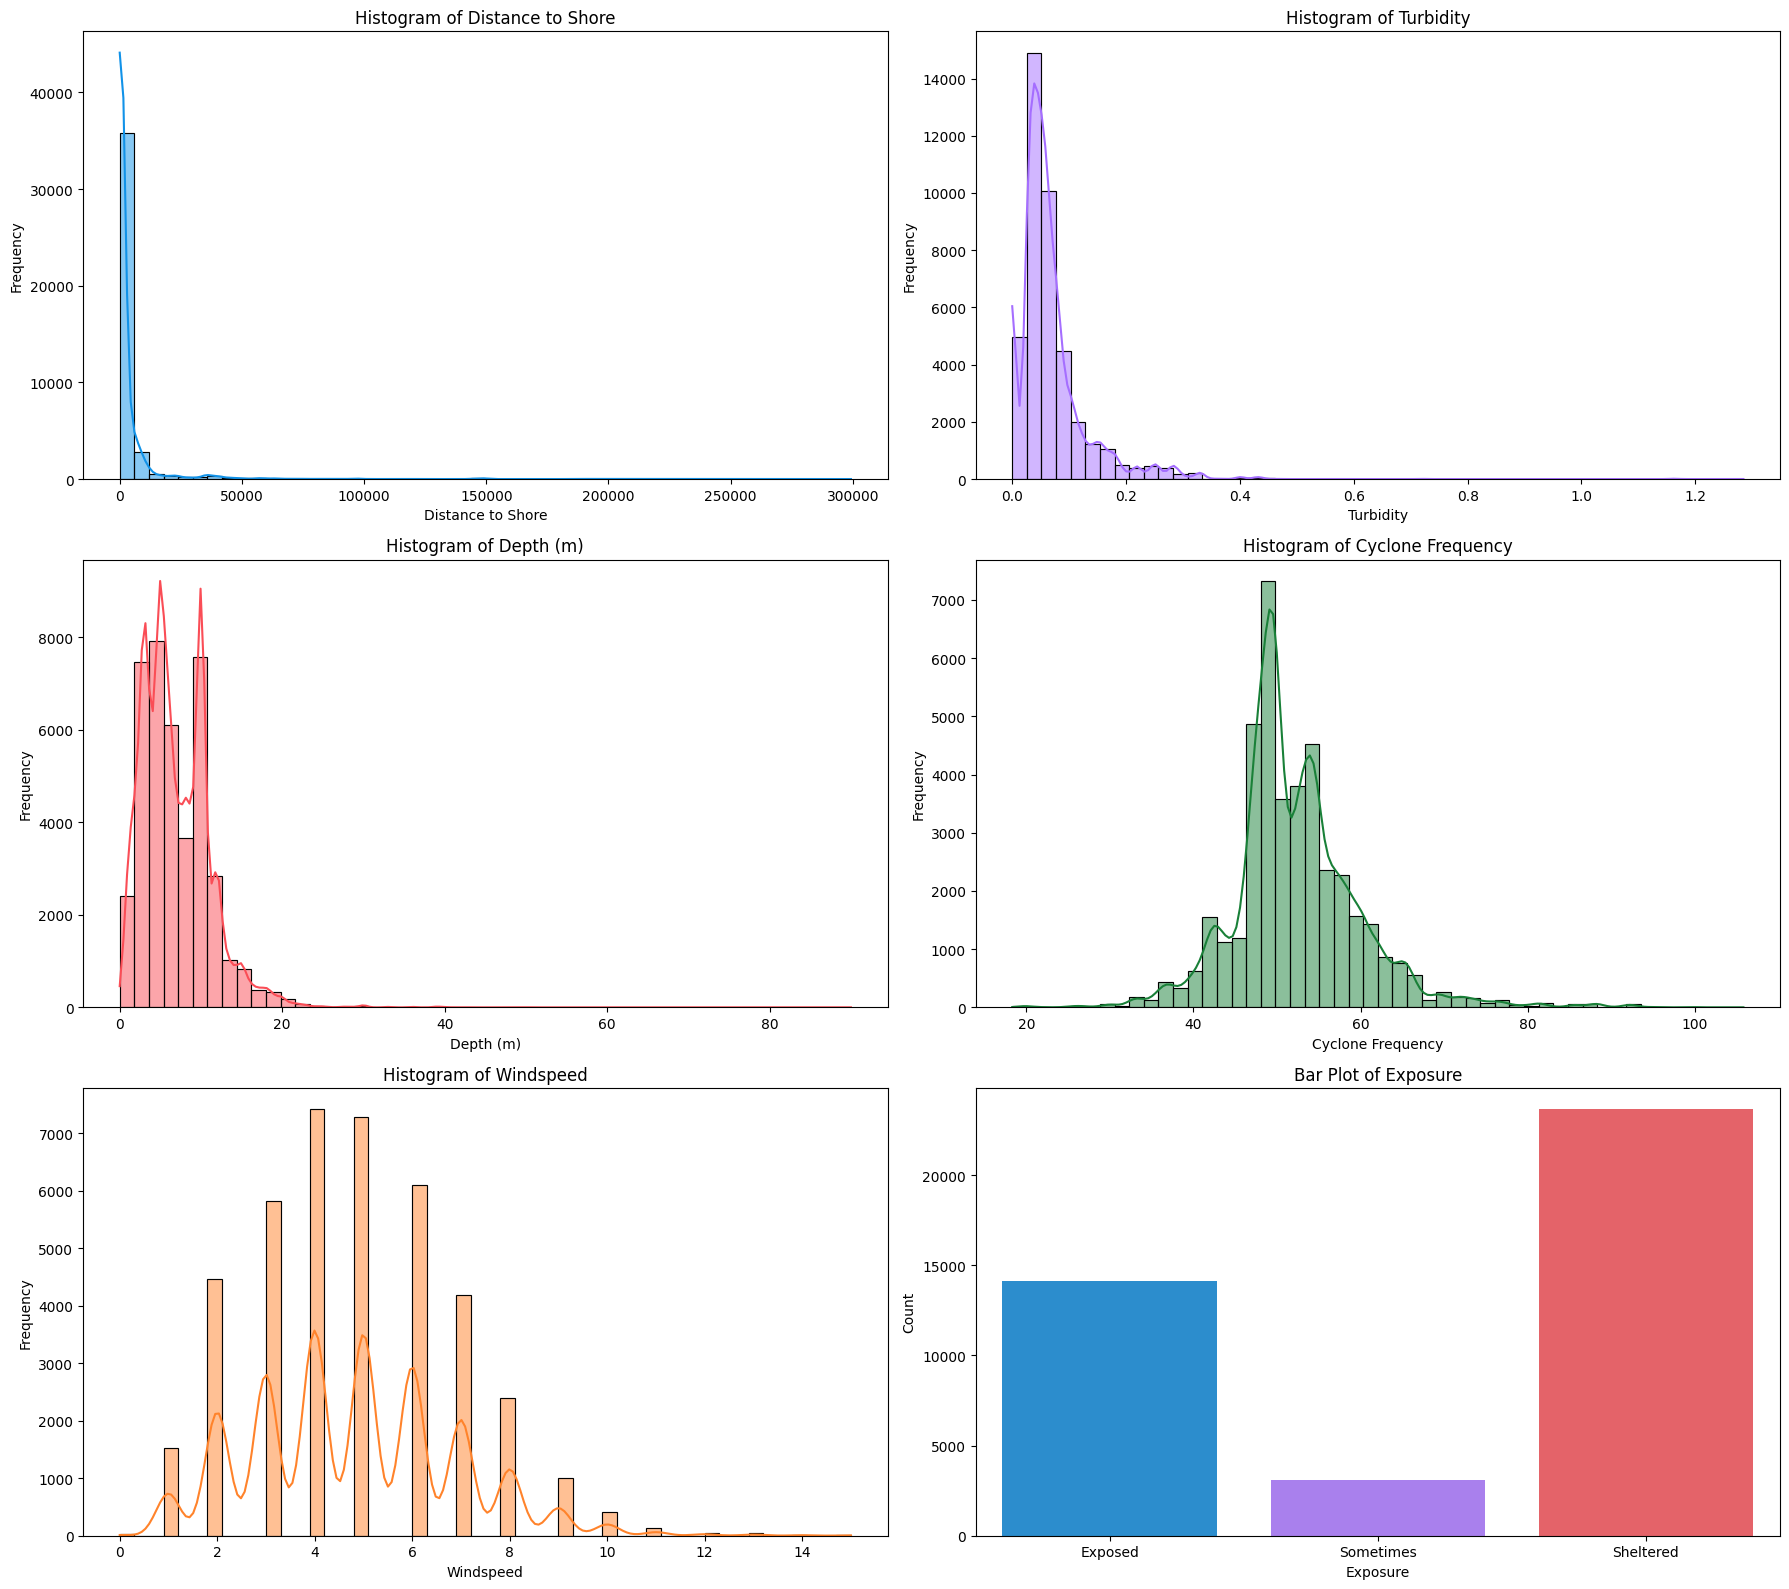

In [43]:
# Set up the figure for the histograms, bar plot, and line plot
plt.figure(figsize=(18, 16))

# Custom colors with the added color #ff832b
colors = ['#1192e8', '#a56eff', '#fa4d56', '#198038', '#ff832b']  # Custom color palette

# Plot histogram for Distance_to_Shore (Blue)
plt.subplot(3, 2, 1)
sns.histplot(data_for_eda['Distance_to_Shore'], bins=50, kde=True, color=colors[0])
plt.title('Histogram of Distance to Shore')
plt.xlabel('Distance to Shore')
plt.ylabel('Frequency')

# Plot histogram for Turbidity (Pink)
plt.subplot(3, 2, 2)
sns.histplot(data_for_eda['Turbidity'], bins=50, kde=True, color=colors[1])
plt.title('Histogram of Turbidity')
plt.xlabel('Turbidity')
plt.ylabel('Frequency')

# Plot histogram for Depth_m (Red)
plt.subplot(3, 2, 3)
sns.histplot(data_for_eda['Depth_m'], bins=50, kde=True, color=colors[2])
plt.title('Histogram of Depth (m)')
plt.xlabel('Depth (m)')
plt.ylabel('Frequency')

# Plot histogram for Cyclone_Frequency (Green)
plt.subplot(3, 2, 4)
sns.histplot(data_for_eda['Cyclone_Frequency'], bins=50, kde=True, color=colors[3])
plt.title('Histogram of Cyclone Frequency')
plt.xlabel('Cyclone Frequency')
plt.ylabel('Frequency')

# Plot histogram for Windspeed (Custom Orange #ff832b)
plt.subplot(3, 2, 5)
sns.histplot(data_for_eda['Windspeed'], bins=50, kde=True, color=colors[4])
plt.title('Histogram of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')

# Plot bar plot for Exposure with 3 distinct colors
plt.subplot(3, 2, 6)
sns.countplot(x='Exposure', data=data_for_eda, palette=[colors[0], colors[1], colors[2]])  # Use 3 colors
plt.title('Bar Plot of Exposure')
plt.xlabel('Exposure')
plt.ylabel('Count')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

🔎 **Observations:**

- **Distance to Shore (Top left):** Most coral sites are located near shore, within **10 km**, with a few outliers up to **300 km** offshore. Nearshore reefs are more exposed to human impacts like runoff, while offshore reefs face oceanic threats.

- **Turbidity (Top right):** Turbidity is generally low, with most values below **0.1**. Higher turbidity, often caused by runoff, can reduce light and stress corals, while low turbidity supports photosynthesis and coral health.

- **Depth (Middle left):** Coral reefs are mostly found in shallow waters (**0-20 meters**). Shallow reefs are more prone to thermal stress and bleaching, while deeper reefs may be less affected by surface temperature changes but face limited light.

- **Cyclone Frequency (Middle right):** Coral sites typically experience **40-60 cyclones**, with some regions facing up to **100**. Cyclones can damage reefs but also cool waters, providing temporary thermal relief.

- **Windspeed (Bottom left):** Wind speeds generally range from **3 to 7 m/s**. Moderate winds reduce thermal stress, while stronger winds during storms can cause physical damage to reefs.

- **Exposure (Bottom right):** Most coral sites are **sheltered** (~12,000 sites), offering protection from strong waves, though limited water circulation increases heat stress risks during warm periods.

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    📝 <strong>Key Insights:</strong>
    <ul>
        <li><strong>Distance to Shore:</strong> Nearshore reefs face human impacts, while offshore reefs are influenced by broader oceanic factors.</li>
        <li><strong>Turbidity:</strong> Low turbidity supports coral health, while higher levels reduce light and can stress reefs.</li>
        <li><strong>Depth:</strong> Shallow reefs are more vulnerable to thermal stress; deeper reefs may handle temperature changes better but face light limitations.</li>
        <li><strong>Cyclone Frequency:</strong> Cyclones can cause damage but may reduce thermal stress, influencing reef resilience.</li>
        <li><strong>Windspeed:</strong> Moderate wind speeds cool waters, while high speeds from storms can physically damage reefs.</li>
        <li><strong>Exposure:</strong> Sheltered reefs are protected from waves but more vulnerable to heat stress due to limited water circulation.</li>
    </ul>
</div>

Coral reefs are shaped by factors like **distance to shore, turbidity, depth, cyclone frequency, windspeed**, and **exposure**. Nearshore reefs face human-driven stress, while offshore and deeper reefs are influenced by oceanic conditions, making these factors key in predicting coral resilience and mitigating bleaching risks.

## Temporal Trends

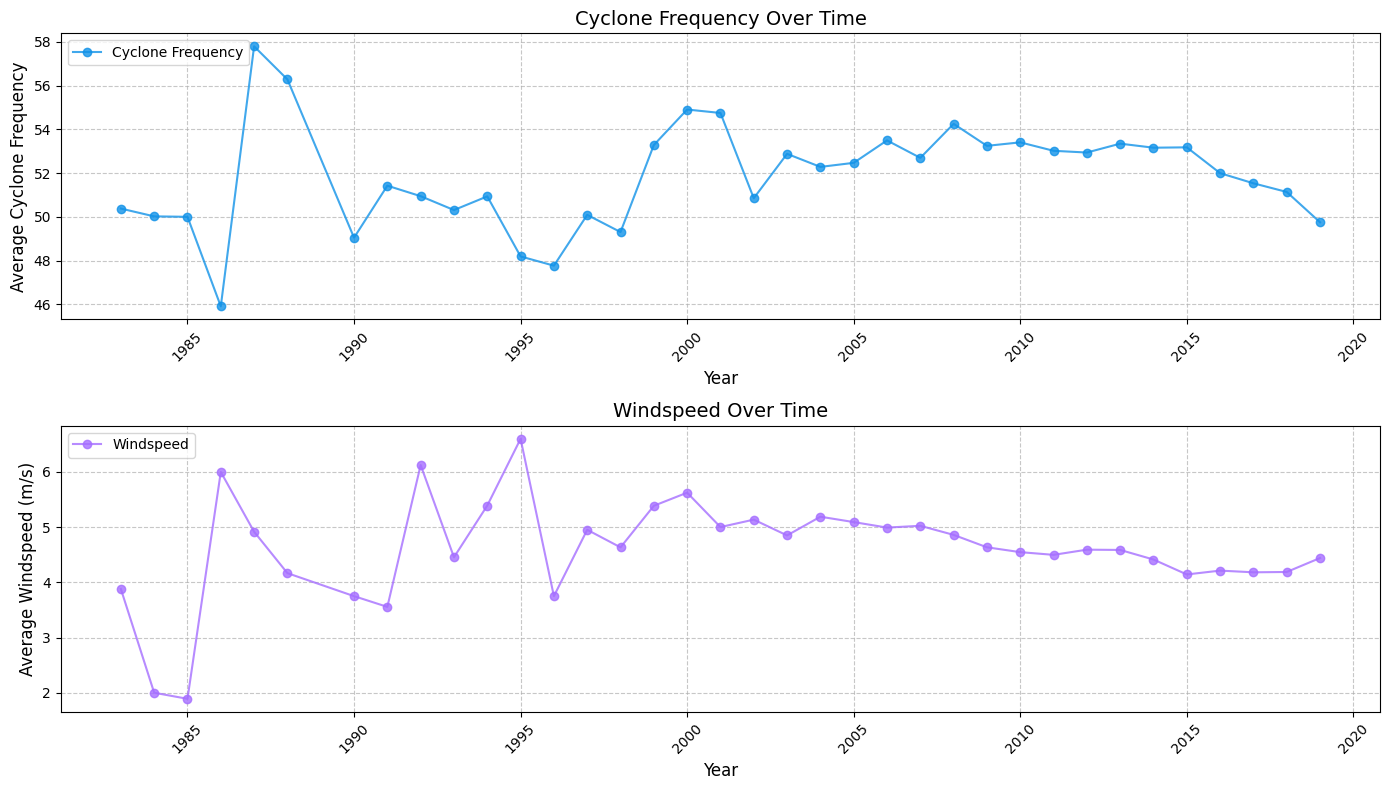

In [97]:
# Extracting year from the Date column for the time series analysis
data_for_eda['Year'] = data_for_eda['Date'].dt.year

# Grouping the data by year and calculating the mean of Cyclone Frequency and Windspeed
yearly_data = data_for_eda.groupby('Year').agg({'Cyclone_Frequency': 'mean', 'Windspeed': 'mean'}).reset_index()

# Define a custom color palette
colors = ['#1192e8', '#a56eff']  # Blue and Pink

# Plotting the time series
plt.figure(figsize=(14, 8))

# Cyclone Frequency over time (Top subplot)
plt.subplot(2, 1, 1)
plt.plot(yearly_data['Year'], yearly_data['Cyclone_Frequency'], marker='o', color=colors[0], linestyle='-', alpha=0.8, label='Cyclone Frequency')
plt.title('Cyclone Frequency Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Cyclone Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.legend(loc='upper left')

# Windspeed over time (Bottom subplot)
plt.subplot(2, 1, 2)
plt.plot(yearly_data['Year'], yearly_data['Windspeed'], marker='o', color=colors[1], linestyle='-', alpha=0.8, label='Windspeed')
plt.title('Windspeed Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Windspeed (m/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Geographical Distribution

In [50]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# Define a function to plot data on a world map using Cartopy


def plot_cartopy_geographical(data, variable, title, cmap='viridis'):
    plt.figure(figsize=(18, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(resolution='110m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    scatter = ax.scatter(data['Longitude_Degrees'], data['Latitude_Degrees'], c=data[variable], 
                         cmap=cmap, s=10, alpha=0.7, transform=ccrs.PlateCarree())
    plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.05, label=variable)
    plt.title(title)
    plt.show()

/Users/amulya/.pyenv/versions/3.10.10/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip

/Users/amulya/.pyenv/versions/3.10.10/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip



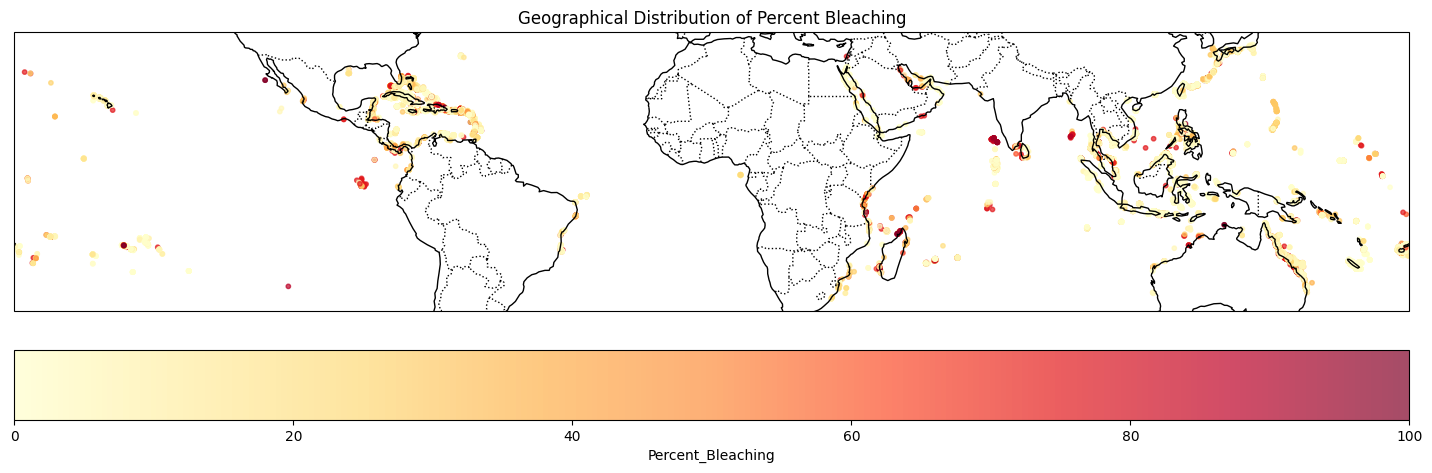

In [51]:
plot_cartopy_geographical(data_for_eda, 'Percent_Bleaching', 'Geographical Distribution of Percent Bleaching', cmap='YlOrRd')

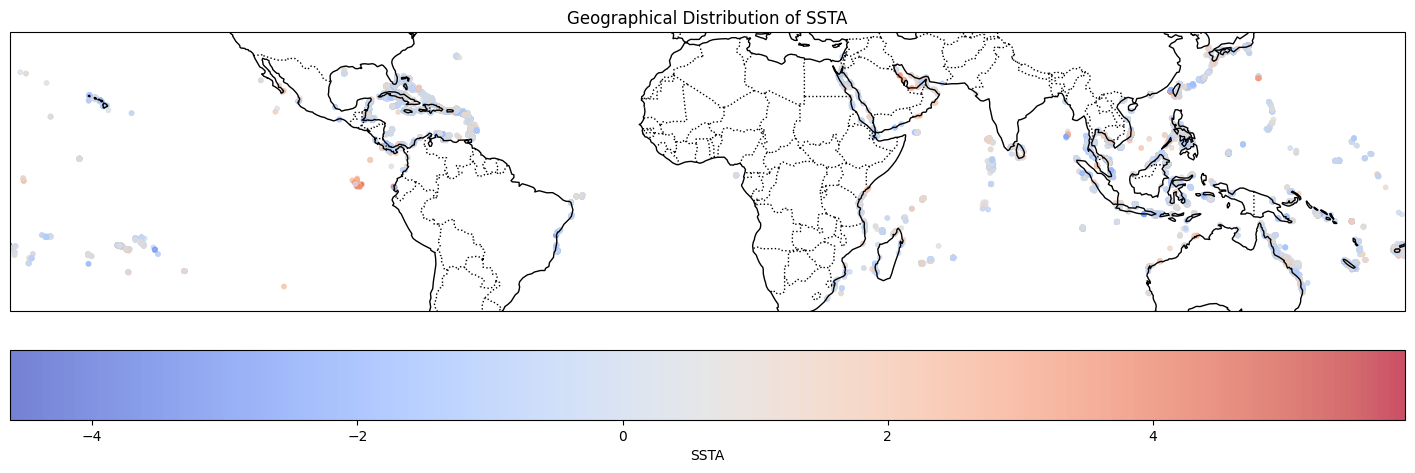

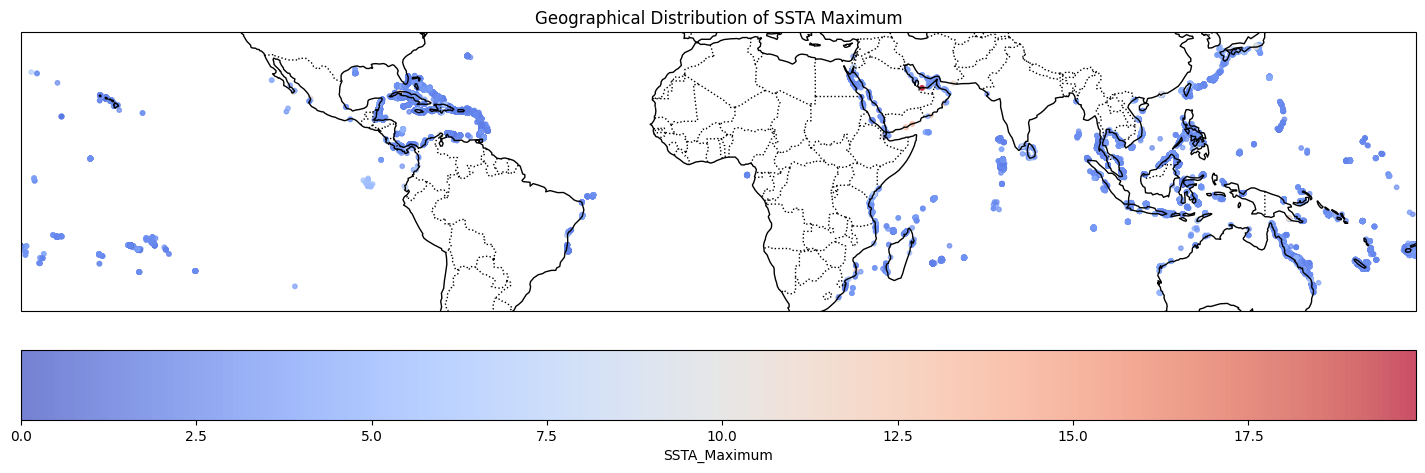

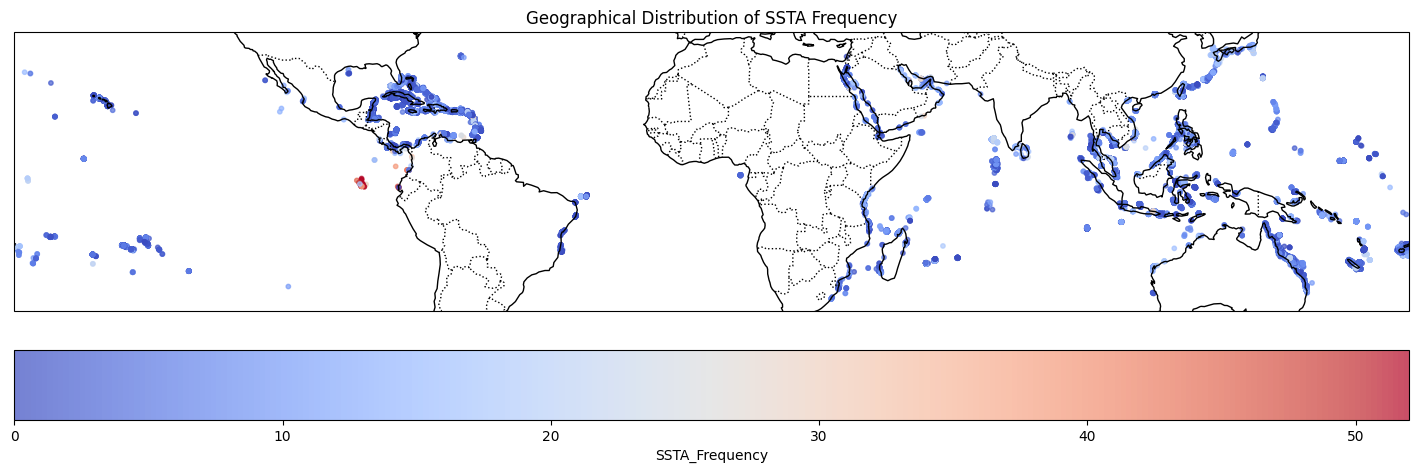

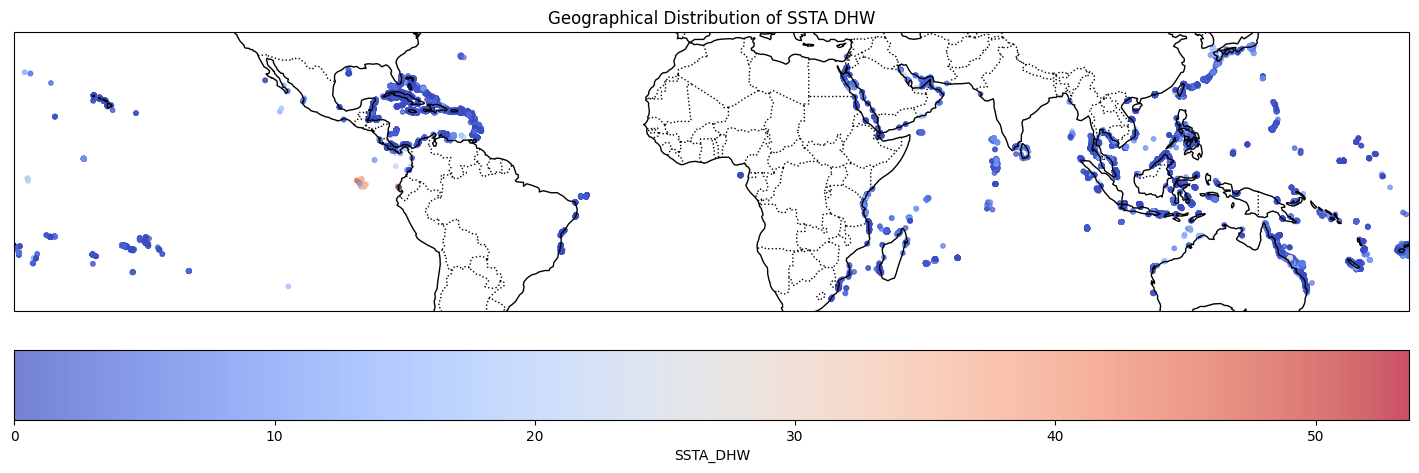

In [53]:
plot_cartopy_geographical(data_for_eda, 'SSTA', 'Geographical Distribution of SSTA', cmap='coolwarm')

plot_cartopy_geographical(data_for_eda, 'SSTA_Maximum', 'Geographical Distribution of SSTA Maximum', cmap='coolwarm')

plot_cartopy_geographical(data_for_eda, 'SSTA_Frequency', 'Geographical Distribution of SSTA Frequency', cmap='coolwarm')

plot_cartopy_geographical(data_for_eda, 'SSTA_DHW', 'Geographical Distribution of SSTA DHW', cmap='coolwarm')

# All Findings

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <p>🌡️🪸 <strong>Temperature and Coral Bleaching:</strong></p>
    <ul>
        <li><strong>Sea Surface Temperature (SST) and Bleaching:</strong> There is a <strong>clear correlation</strong> between rising SST and coral bleaching. Bleaching severity significantly increases when SST exceeds <strong>300 K (~27°C)</strong>, indicating a critical temperature threshold beyond which coral reefs experience significant stress. SST and SST anomalies (SSTA) are key drivers of coral bleaching, particularly in regions like the <strong>Caribbean</strong>, <strong>Red Sea</strong>, and <strong>Southeast Asia</strong>.</li>
        <li><strong>Sustained Thermal Stress:</strong> Prolonged exposure to high temperatures, measured through <strong>Degree Heating Weeks (DHW)</strong>, strongly correlates with bleaching. Reefs in the <strong>Caribbean</strong> and <strong>Indo-Pacific</strong> regions, which experience frequent and prolonged thermal anomalies, are particularly vulnerable.</li>
        <li><strong>Temperature Anomalies (TSA):</strong> While short-term spikes in temperature contribute to bleaching, <strong>sustained temperature anomalies (SSTA and TSA)</strong> are more impactful. Areas experiencing frequent and prolonged thermal stress, such as parts of the <strong>Red Sea</strong> and <strong>Southeast Asia</strong>, face severe bleaching.</li>
    </ul>
    <p>🌍🪸 <strong>Geographical and Regional Patterns:</strong></p>
    <ul>
        <li><strong>Bleaching Hotspots:</strong> The most severely affected regions are concentrated in the <strong>Caribbean</strong>, <strong>Red Sea</strong>, <strong>Indian Ocean</strong>, and <strong>Southeast Asia</strong>. These areas face frequent temperature anomalies, prolonged heat stress, and a combination of human-induced and natural stressors.</li>
        <li><strong>Resilience in Cooler Regions:</strong> Coral reefs in <strong>cooler regions</strong> like the <strong>central Pacific</strong> and some parts of the <strong>Atlantic</strong> show lower bleaching severity, suggesting higher resilience due to less frequent exposure to extreme thermal events.</li>
        <li><strong>Vulnerability of Shallow Coral Sites:</strong> Shallow reefs, especially in the <strong>Caribbean</strong> and <strong>Southeast Asia</strong>, are more vulnerable to <strong>thermal stress</strong> and <strong>human interference</strong>, making them critical zones for targeted conservation efforts.</li>
    </ul>
    <p>🌪️💨 <strong>Complex Interplay of Stress Factors:</strong></p>
    <ul>
        <li><strong>Temperature as the Dominant Factor:</strong> While environmental factors like <strong>depth</strong>, <strong>turbidity</strong>, and <strong>cyclones</strong> contribute to bleaching, <strong>temperature-related stress</strong> (SST, SSTA, TSA) remains the primary driver. The <strong>threshold effect</strong> of SST (300 K) and the <strong>accumulation of stress</strong> over time (DHW) are critical in predicting bleaching severity.</li>
    <p>🛟🌊 <strong>Conservation Implications:</strong></p>
    <ul>
        <li><strong>High-Risk Regions:</strong> Areas like the <strong>Caribbean</strong>, <strong>Red Sea</strong>, and <strong>Southeast Asia</strong> should be prioritized for conservation due to the high frequency of bleaching events and their exposure to both <strong>natural</strong> and <strong>anthropogenic stressors</strong>.</li>
        <li><strong>Protective Measures for Shallow and Sheltered Reefs:</strong> These reefs show lower bleaching severity but remain vulnerable to <strong>temperature anomalies</strong> and <strong>runoff</strong>. Protective measures like <strong>reducing local pollution</strong> and <strong>improving water quality</strong> can mitigate stress.</li>
        <li><strong>Long-Term Monitoring:</strong> Regions with high <strong>thermal anomaly frequencies</strong> and <strong>prolonged DHW exposure</strong> should be closely monitored. This will help predict future bleaching events and implement adaptive strategies to build <strong>resilience</strong> in vulnerable coral ecosystems.</li>
    </ul>
</div>

# Things that can be done for Feature Engineering

<div style="border-radius:10px;border:#6495ED solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
    <p>🌡️ <strong>Sea Surface Temperature (SST):</strong></p>
    <ul>
        <li><strong>SST</strong> is a critical feature, as it shows a consistent, positive correlation with coral bleaching severity. Reefs experiencing SST above <strong>300 K (~27°C)</strong> are at significant risk for bleaching.</li>
        <li><strong>SST Maximum</strong> adds value by capturing extreme heat events, though it has a weaker relationship with bleaching severity compared to average SST.</li>
    </ul>
    <p>🌡️ 📈 <strong>Sea Surface Temperature Anomalies (SSTA):</strong></p>
    <ul>
        <li><strong>SSTA</strong> and <strong>SSTA Maximum</strong> are key predictors of bleaching. Anomalies above <strong>2-4 K</strong> are strongly associated with higher bleaching percentages.</li>
        <li><strong>SSTA Frequency</strong> and <strong>SSTA DHW</strong> (Degree Heating Weeks) capture chronic thermal stress, making them crucial for identifying areas experiencing prolonged heat stress.</li>
    </ul>
    <p>🔥 <strong>Temperature Stress Anomalies (TSA):</strong></p>
    <ul>
        <li><strong>TSA</strong> and <strong>TSA Maximum</strong> correlate strongly with bleaching severity, particularly when TSA reaches values above <strong>0K</strong>, capturing short-term temperature deviations that often precede bleaching.</li>
        <li><strong>TSA DHW</strong> and <strong>TSA Frequency</strong> are engineered features that highlight prolonged and frequent heat stress, showing strong correlation with bleaching outcomes.</li>
    </ul>
    <p>🌊 <strong>Depth:</strong></p>
    <ul>
        <li>Depth emerges as moderately important, especially for predicting bleaching severity in deeper reefs. Reefs at <strong>depths above 20 meters</strong> tend to experience more severe bleaching, likely due to reduced sunlight and slower recovery.</li>
    </ul>
    <p>🌪️💨 <strong>Cyclone Frequency and Windspeed:</strong></p>
    <ul>
        <li>Cyclone frequency and windspeed have mixed roles in coral bleaching. While cyclones can cool waters, reducing bleaching, frequent storms or strong winds increase physical damage. These features show weak individual correlations but may improve predictions when combined with other environmental factors.</li>
    </ul>
    <p>🌫️ <strong>Turbidity:</strong></p>
    <ul>
        <li>Turbidity shows a weak yet relevant correlation with bleaching. Reefs in moderately turbid waters experience the highest bleaching severity, suggesting that feature engineering around turbidity and depth could improve predictions by accounting for light limitations in shallow areas.</li>
    </ul>
    <p>🏖️ <strong>Proximity to Shore:</strong></p>
    <ul>
        <li>Distance to shore provides insights into human-driven stressors like pollution and runoff. Though its correlation with bleaching is weak, this feature can be engineered with turbidity and depth to better capture nearshore human impacts.</li>
    </ul>
</div>